# import library

In [1]:
from sqlite3 import connect
import pickle
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# Load data

In [2]:
# SQLite3 connection
con = connect('dataset/sk2/hotel-directories-ORI.sqlite3')
df_sql_hotel = pd.read_sql_query("SELECT * from hotel_yogyakarta", con=con)
df_sql_room = pd.read_sql_query("SELECT * from hotel_room_yogyakarta", con=con)
con.close()

# Table columns
print('Kolom Tabel Hotel :')
print(df_sql_hotel.columns)
print("Total Baris :", df_sql_hotel.shape[0])
print("Total Kolom :", df_sql_hotel.shape[1])

print('-' * 50)

print('Kolom Tabel Kamar:')
print(df_sql_room.columns)
print("Total Baris :", df_sql_room.shape[0])
print("Total Kolom :", df_sql_room.shape[1])

Kolom Tabel Hotel :
Index(['id', 'type', 'name', 'starRating', 'builtYear', 'description', 'link',
       'address', 'city', 'image', 'facilities', 'nearestPointOfInterests'],
      dtype='object')
Total Baris : 378
Total Kolom : 12
--------------------------------------------------
Kolom Tabel Kamar:
Index(['id', 'hotelId', 'roomType', 'description', 'bedDescription', 'size',
       'originalRate', 'baseOccupancy', 'maxChildAge', 'maxChildOccupancy',
       'numExtraBeds', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable',
       'hasLivingRoom', 'facilities'],
      dtype='object')
Total Baris : 1199
Total Kolom : 16


In [3]:
print(f"Dimensi : {df_sql_hotel.shape}")
df_sql_hotel.sample(2)

Dimensi : (378, 12)


,id,type,name,starRating,builtYear,description,link,address,city,image,facilities,nearestPointOfInterests
158,3000010001123,Hotel,Nueve Malioboro Jogja Hotel,2.0,2013,<p><b>Lokasi</b><br>Menginap di Nueve Maliobor...,https://www.traveloka.com/id-id/hotel/detail?s...,"Jl. Mataram No. 9, Jalan Malioboro, Yogyakarta...",Yogyakarta,https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""LATE_CHEC...","[{""landmarkId"":""91516349005487"",""geoId"":null,""..."
152,3000020005856,Hotel,The Journey Hotel,0.0,2017,<p><b>Lokasi</b><br>Menginap di The Journey Ho...,https://www.traveloka.com/id-id/hotel/detail?s...,"Jl. Sorosutan 2E, Umbulharjo, Umbulharjo, Yogy...",Yogyakarta,https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""INTERNET_POINT""...","[{""landmarkId"":""91589527350071"",""geoId"":null,""..."


In [4]:
print(f"Dimensi : {df_sql_room.shape}")
df_sql_room.sample(2)

Dimensi : (1199, 16)


,id,hotelId,roomType,description,bedDescription,size,originalRate,baseOccupancy,maxChildAge,maxChildOccupancy,numExtraBeds,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,facilities
420,1004143748,3000020001130,1 King Bed,<p><strong>1 King Bed</strong></p><p>452-sq-fo...,None,None,"{""amount"":""1935266"",""currency"":""IDR"",""tax"":""0""}",1,0,0,0,0,1,1,0,"[""OTHER"",""SATELLITE_CABLE_TV"",""BLACKOUT_CURTAI..."
925,1000108421,3000010028483,Double Bed,"<p><span>Maksimal tamu hanya untuk 2 orang, le...",None,None,"{""amount"":""123967"",""currency"":""IDR"",""tax"":""260...",2,5,0,0,0,1,0,0,"[""AIR_CONDITIONING"",""COMPLIMENTARY_BOTTLED_WAT..."


In [5]:
# Fungsi menghitung unique value
def check_unique(df):
    count = 0
    for i in df.columns:
        if df[i].nunique() == 1:
            count += 1
            print(f'{i}: {df[i].nunique()}')
        else:
            print(f'{i}: {df[i].nunique()}')
    if count == 0:
        print('No columns with only one unique value')

In [6]:
check_unique(df_sql_hotel)

id: 378
type: 1
name: 377
starRating: 8
builtYear: 38
description: 378
link: 378
address: 377
city: 1
image: 377
facilities: 372
nearestPointOfInterests: 375


In [7]:
check_unique(df_sql_room)

id: 1199
hotelId: 375
roomType: 423
description: 544
bedDescription: 0
size: 87
originalRate: 714
baseOccupancy: 9
maxChildAge: 13
maxChildOccupancy: 5
numExtraBeds: 1
isBreakfastIncluded: 2
isWifiIncluded: 2
isRefundable: 2
hasLivingRoom: 2
facilities: 600


# Menghapus Kolom

In [8]:
hotelDrop = ['name', 'description', 'link', 'address', 'image', 'type', 'city']
roomDrop = ['id', 'roomType', 'description', 'bedDescription', 'numExtraBeds']

df_hotel = df_sql_hotel.drop(hotelDrop, axis=1)
df_room = df_sql_room.drop(roomDrop, axis=1)

print('Total Hotel Table Data : ', df_hotel.shape[0])
print('Total Hotel Table Column : ', df_hotel.shape[1])
print('-' * 30)
print('Total Room Table Data : ', df_room.shape[0])
print('Total Room Table Column : ', df_room.shape[1])

Total Hotel Table Data :  378
Total Hotel Table Column :  5
------------------------------
Total Room Table Data :  1199
Total Room Table Column :  11


# Merge Data

In [9]:
# Rename column
df_hotel.rename(columns={'id': 'hotelId'}, inplace=True)
df_hotel.rename(columns={'facilities': 'hotelFacilities'}, inplace=True)
df_room.rename(columns={'facilities': 'roomFacilities'}, inplace=True)

In [10]:
# merge hotel dan room data
df = pd.merge(df_hotel, df_room, on='hotelId', how='inner')

# remove id column
df.drop(columns=['hotelId'], inplace=True)

# re arrange column
df = df[['originalRate', 'starRating', 'builtYear', 'size', 'baseOccupancy', 'maxChildAge',
         'maxChildOccupancy', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable',
         'hasLivingRoom', 'hotelFacilities', 'roomFacilities', 'nearestPointOfInterests']]

df

,originalRate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,hotelFacilities,roomFacilities,nearestPointOfInterests
0,"{""amount"":""1008264"",""currency"":""IDR"",""tax"":""21...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
1,"{""amount"":""1049587"",""currency"":""IDR"",""tax"":""22...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
2,"{""amount"":""1049587"",""currency"":""IDR"",""tax"":""22...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
3,"{""amount"":""1842975"",""currency"":""IDR"",""tax"":""38...",5.0,2013,60.0,2,8,0,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
4,"{""amount"":""2396694"",""currency"":""IDR"",""tax"":""50...",5.0,2013,80.0,2,8,0,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,"{""amount"":""308540"",""currency"":""IDR"",""tax"":""647...",1.0,None,15.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1195,"{""amount"":""220385"",""currency"":""IDR"",""tax"":""462...",1.0,None,16.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1196,"{""amount"":""296425"",""currency"":""IDR"",""tax"":""622...",2.0,2013,25.0,2,10,1,0,1,1,0,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""SAFETY_DE...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""COFFEE_...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."
1197,"{""amount"":""994485"",""currency"":""IDR"",""tax"":""208...",2.0,2013,60.0,6,10,1,0,1,1,0,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""SAFETY_DE...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""COFFEE_...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."


# target processing

In [11]:
for i in range(0, 5):
    print(df.loc[i, 'originalRate'])

{"amount":"1008264","currency":"IDR","tax":"211736"}
{"amount":"1049587","currency":"IDR","tax":"220413"}
{"amount":"1049587","currency":"IDR","tax":"220413"}
{"amount":"1842975","currency":"IDR","tax":"387025"}
{"amount":"2396694","currency":"IDR","tax":"503306"}


In [12]:
# Extract the amount from originalRate using a lambda function
df['rate'] = df['originalRate'].apply(lambda x: json.loads(x)['amount'])
df['tax'] = df['originalRate'].apply(lambda x: json.loads(x)['tax'])
df = df.drop(columns=['originalRate'])

In [13]:
# check tipe data
print('Tipe data harga :', df['rate'].dtype)
print('Tipe data pajak :', df['tax'].dtype)

Tipe data harga : object
Tipe data pajak : object


In [14]:
# ubah tipe data
df['rate'] = df['rate'].astype('int')
df['tax'] = df['tax'].astype('int')

print('Tipe data harga :', df['rate'].dtype)
print('Tipe data pajak :', df['tax'].dtype)

Tipe data harga : int32
Tipe data pajak : int32


## rasio pajak

In [15]:

# create series for original rate
original_rate = df['rate']
# create series for tax
tax = df['tax']
# create dataframe for original rate, tax, and tax rate
df_rate = pd.DataFrame({'original_rate': original_rate, 'tax': tax})
df_rate['tax_rate'] = df_rate['tax'] / df_rate['original_rate'] * 100

df_rate

,original_rate,tax,tax_rate
0,1008264,211736,21.000056
1,1049587,220413,20.999974
2,1049587,220413,20.999974
3,1842975,387025,21.000014
4,2396694,503306,21.000011
...,...,...,...
1194,308540,64793,20.999870
1195,220385,46282,21.000522
1196,296425,62249,20.999916
1197,994485,208842,21.000015


Median pajak :  20.99999233666715
null / 0% pajak:  63
Pajak diantara 0 - 20%: 8
Rasio pajak diatas 20% : 1128


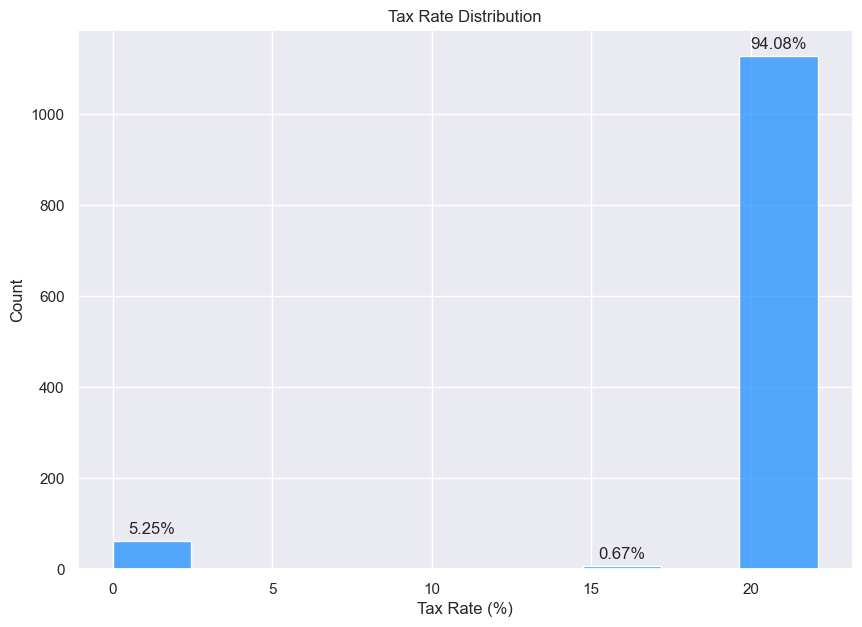

In [16]:
# count number of data with tax rate 20% and under 21%, also over 21%
count0 = 0
count_20 = 0
countBetween = 0
for i in range(len(df_rate['tax_rate'])):
    if df_rate['tax_rate'][i] < 20 and df_rate['tax_rate'][i] > 0:
        countBetween += 1
    elif df_rate['tax_rate'][i] >= 20:
        count_20 += 1
    elif df_rate['tax_rate'][i] == 0:
        count0 += 1
print('Median pajak : ', df_rate['tax_rate'].median())
print('null / 0% pajak: ', count0)
print('Pajak diantara 0 - 20%:', countBetween)
print('Rasio pajak diatas 20% :', count_20)


# plot for tax rate and give the total value on the top of the bar if the value is 0% it will not show
sns.set(rc={'figure.figsize': (10, 7)})
sns.set_style('darkgrid')
ax = sns.histplot(df_rate['tax_rate'], kde=False, color='dodgerblue', bins=9)
ax.set(xlabel='Tax Rate (%)', ylabel='Count')
ax.set_title('Tax Rate Distribution')
total = len(df_rate['tax_rate'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x()+p.get_width()/2.,
                height + 15,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
plt.show()

In [17]:
# Menghapus kolom pajak
df = df.drop(columns=['tax'])

# Mengubah target kolom menjadi di awal
# sekedar untuk merapikan dataframe
df = df[['rate'] + [col for col in df.columns if col != 'rate']]
df.columns

Index(['rate', 'starRating', 'builtYear', 'size', 'baseOccupancy',
       'maxChildAge', 'maxChildOccupancy', 'isBreakfastIncluded',
       'isWifiIncluded', 'isRefundable', 'hasLivingRoom', 'hotelFacilities',
       'roomFacilities', 'nearestPointOfInterests'],
      dtype='object')

# Validasi data

OriginalRate Distribution by starRating
starRating
0.0    332
3.0    240
4.0    204
2.0    160
1.0    153
5.0     92
2.5     12
3.5      6
Name: count, dtype: int64


C:\Users\wilda\AppData\Local\Temp\ipykernel_6252\3581573076.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_percentage.index, y=value_percentage.values,


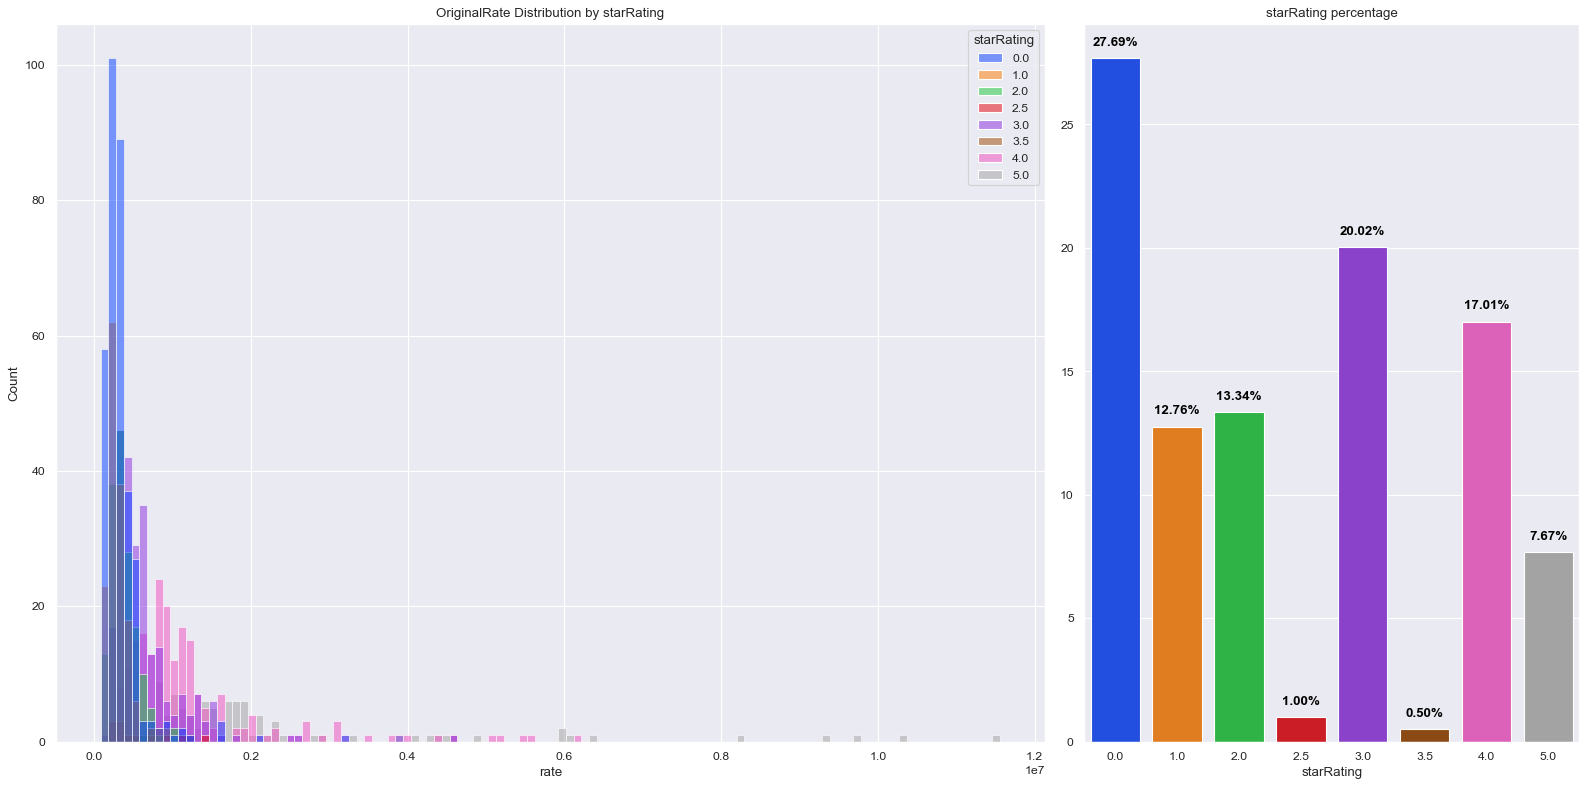

In [18]:
# starRating Distribution
value = df.starRating.value_counts()
print('OriginalRate Distribution by starRating')
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i)
                         for i in value_percentage.index]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df, x="rate", hue='starRating', palette='bright',
             ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values,
            palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for container in ax[1].containers:
    for bar in container.patches:
        v = bar.get_height()
        bar_center = bar.get_x() + bar.get_width() / 2
        ax[1].text(bar_center, v + 0.5,
                   f'{v:.2f}%', color='black', fontweight='bold', ha='center')
fig.tight_layout()

In [19]:
# ubah starRating dengan angka bulat
df['starRating'] = df['starRating'].replace(2.5, 2)
df['starRating'] = df['starRating'].replace(3.5, 3)

OriginalRate Distribution by starRating
starRating
0.0    332
3.0    246
4.0    204
2.0    172
1.0    153
5.0     92
Name: count, dtype: int64


C:\Users\wilda\AppData\Local\Temp\ipykernel_6252\3581573076.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_percentage.index, y=value_percentage.values,


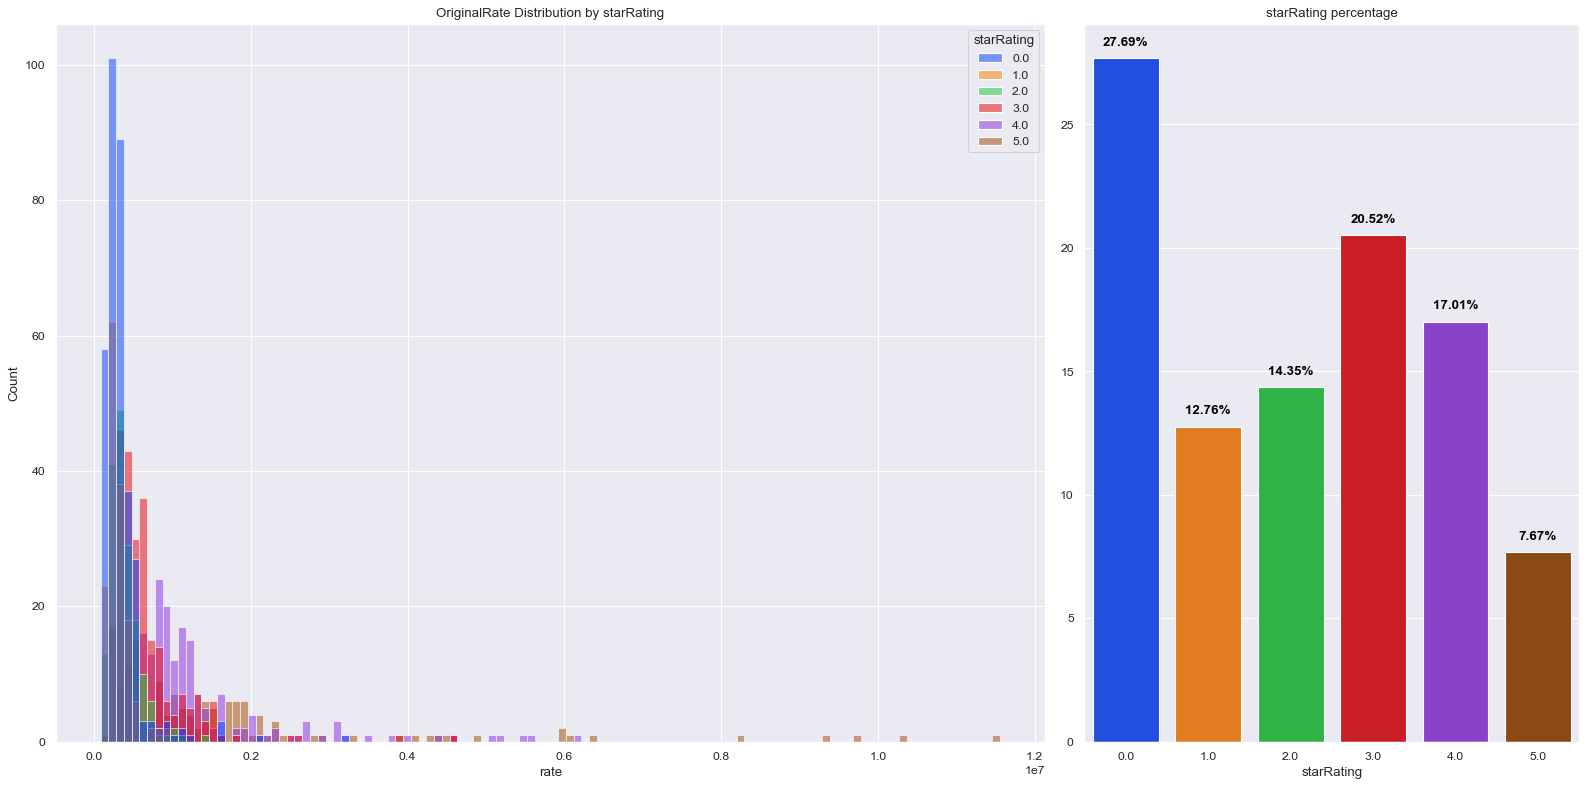

In [20]:
# starRating Distribution
value = df.starRating.value_counts()
print('OriginalRate Distribution by starRating')
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i)
                         for i in value_percentage.index]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df, x="rate", hue='starRating', palette='bright',
             ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values,
            palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for container in ax[1].containers:
    for bar in container.patches:
        v = bar.get_height()
        bar_center = bar.get_x() + bar.get_width() / 2
        ax[1].text(bar_center, v + 0.5,
                   f'{v:.2f}%', color='black', fontweight='bold', ha='center')
fig.tight_layout()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rate                     1199 non-null   int32  
 1   starRating               1199 non-null   float64
 2   builtYear                878 non-null    object 
 3   size                     1064 non-null   object 
 4   baseOccupancy            1199 non-null   int64  
 5   maxChildAge              1199 non-null   int64  
 6   maxChildOccupancy        1199 non-null   int64  
 7   isBreakfastIncluded      1199 non-null   int64  
 8   isWifiIncluded           1199 non-null   int64  
 9   isRefundable             1199 non-null   int64  
 10  hasLivingRoom            1199 non-null   int64  
 11  hotelFacilities          1199 non-null   object 
 12  roomFacilities           1199 non-null   object 
 13  nearestPointOfInterests  1199 non-null   object 
dtypes: float64(1), int32(1),

In [22]:
df['starRating'] = df['starRating'].astype('int')
print('Tipe data starRating :', df['starRating'].dtype)

Tipe data starRating : int32


## check duplicate data

In [23]:
# show index who has duplicate value
print('Total duplicated row = ', df.duplicated().sum())
# print duplicated data list index 1
df[df.duplicated(keep=False)]

Total duplicated row =  89


,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,hotelFacilities,roomFacilities,nearestPointOfInterests
1,1049587,5,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
2,1049587,5,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
6,6000000,5,2012,105.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""COF...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
7,6000000,5,2012,105.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""COF...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
8,1933333,5,2012,40.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""COMPLIMENTARY...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,141273,0,None,None,2,5,0,0,0,1,0,"[""HAS_24_HOUR_FRONT_DESK""]",[],"[{""landmarkId"":""91607407537252"",""geoId"":null,""..."
1173,550964,0,None,None,2,5,0,0,0,1,0,[],[],"[{""landmarkId"":""91607407802715"",""geoId"":null,""..."
1174,550964,0,None,None,2,5,0,0,0,1,0,[],[],"[{""landmarkId"":""91607407802715"",""geoId"":null,""..."
1189,413223,1,None,9.0,2,10,0,0,1,1,0,"[""WIFI_PUBLIC_AREA"",""ACCESS_FRIENDLY"",""ACCESSI...","[""AIR_CONDITIONING"",""DESK"",""NON_SMOKING_ROOMS""...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."


In [24]:
# drop duplicate data
df = df.drop_duplicates(keep='first')
df.shape

(1110, 14)

## Check Null

In [25]:
# Jumlah baris data
jumlah_baris_ori = df.shape[0]

# crate dataframe for null value
df_null = pd.DataFrame(df.isnull().sum(), columns=['null_value'])
df_null['null_value_percentage'] = df_null['null_value'] / len(df) * 100
df_null

,null_value,null_value_percentage
rate,0,0.000000
starRating,0,0.000000
builtYear,305,27.477477
size,121,10.900901
baseOccupancy,0,0.000000
maxChildAge,0,0.000000
maxChildOccupancy,0,0.000000
isBreakfastIncluded,0,0.000000
isWifiIncluded,0,0.000000
isRefundable,0,0.000000


In [26]:
# create new dataframe for null value rows
df_null_rows = df[df.isnull().any(axis=1)]
df_null_rows

,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,hotelFacilities,roomFacilities,nearestPointOfInterests
41,716253,4,None,28.0,2,5,0,0,1,0,0,"[""COFFEE_SHOP"",""ELEVATOR"",""RESTAURANT_FOR_BREA...","[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...","[{""landmarkId"":""91510822038476"",""geoId"":null,""..."
42,826447,4,None,28.0,2,5,0,0,1,0,0,"[""COFFEE_SHOP"",""ELEVATOR"",""RESTAURANT_FOR_BREA...","[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...","[{""landmarkId"":""91510822038476"",""geoId"":null,""..."
43,936639,4,None,35.0,2,5,0,0,1,0,0,"[""COFFEE_SHOP"",""ELEVATOR"",""RESTAURANT_FOR_BREA...","[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...","[{""landmarkId"":""91510822038476"",""geoId"":null,""..."
44,1212121,4,None,28.0,2,5,0,0,1,0,0,"[""COFFEE_SHOP"",""ELEVATOR"",""RESTAURANT_FOR_BREA...","[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...","[{""landmarkId"":""91510822038476"",""geoId"":null,""..."
60,846281,4,2018,None,1,0,0,0,1,0,0,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[""TOWELS_PROVIDED"",""NON_SMOKING_ROOMS"",""LINENS...","[{""landmarkId"":""91575379594159"",""geoId"":null,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,187328,1,None,12.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""DESK"",""FAN"",""PRIVATE_BATHROOM"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1193,440772,1,None,28.0,4,12,2,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""BATHTUB"",""DESK"",""TELEVISI...","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1194,308540,1,None,15.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1195,220385,1,None,16.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."


In [27]:
# ubah sementara null value menjadi 0
df['builtYear'] = df['builtYear'].fillna(0)
df['size'] = df['size'].fillna(0)

# ubah tipe data
df['builtYear'] = df['builtYear'].astype('int32')
df['size'] = df['size'].astype('float')

print('Tipe data builtYear :', df['builtYear'].dtype)
print('Tipe data size :', df['size'].dtype)

Tipe data builtYear : int32
Tipe data size : float64


In [28]:
# ubah nilai 0 pada kolom builtYear menjadi median tiap starRating
for i in df['starRating'].unique():
    df.loc[(df['starRating'] == i) & (df['builtYear'] == 0),
           'builtYear'] = df[df['starRating'] == i]['builtYear'].median()

# ubah nilai 0 pada kolom size menjadi median tiap starRating
for i in df['starRating'].unique():
    df.loc[(df['starRating'] == i) & (df['size'] == 0),
           'size'] = df[df['starRating'] == i]['size'].median()
    
# crate dataframe for null value
df_null = pd.DataFrame(df.isnull().sum(), columns=['null_value'])
df_null['null_value_percentage'] = df_null['null_value'] / len(df) * 100
df_null

,null_value,null_value_percentage
rate,0,0.0
starRating,0,0.0
builtYear,0,0.0
size,0,0.0
baseOccupancy,0,0.0
maxChildAge,0,0.0
maxChildOccupancy,0,0.0
isBreakfastIncluded,0,0.0
isWifiIncluded,0,0.0
isRefundable,0,0.0


In [29]:
df.describe()

,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
count,1.110000e+03,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,7.118771e+05,2.042342,1993.248649,25.430982,2.080180,6.528829,0.747748,0.322523,0.896396,0.457658,0.020721
std,9.971952e+05,1.643362,122.853595,20.378749,0.804554,3.013432,0.570834,0.467652,0.304883,0.498428,0.142512
min,8.264500e+04,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.708675e+05,0.000000,2000.000000,16.000000,2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.081860e+05,2.000000,2012.000000,21.000000,2.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,7.816760e+05,3.000000,2015.000000,29.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.156198e+07,5.000000,2022.000000,350.000000,16.000000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000


## Built Year Data Handling

In [30]:
# Cek nilai unique pada kolom builtYear dibawah 2000
print('Nilai unique builtYear dibawah 2000 :')
print(df[df['builtYear'] < 2000]['builtYear'].unique())

print('Nilai unique bulitYear dibawah 1900 :')
print(df[df['builtYear'] < 1900]['builtYear'].unique())

Nilai unique builtYear dibawah 2000 :
[1997 1995 1964 1990 1992 1937    1 1994 1977 1993 1996 1978 1989 1986
 1998]
Nilai unique bulitYear dibawah 1900 :
[1]


In [31]:
# menghapus baris yang memiliki nilai dibawah 1900 pada kolom builtYear
df = df[df['builtYear'] > 1900]

# Cek nilai unique pada kolom builtYear dibawah 2000
print('Nilai unique builtYear dibawah 2000 :')
print(df[df['builtYear'] < 2000]['builtYear'].unique())

Nilai unique builtYear dibawah 2000 :
[1997 1995 1964 1990 1992 1937 1994 1977 1993 1996 1978 1989 1986 1998]


## Outlier Handling

Harga
maximum value : 11561983
minimum value : 82645
skew value : 5.33


<Figure size 1600x800 with 0 Axes>

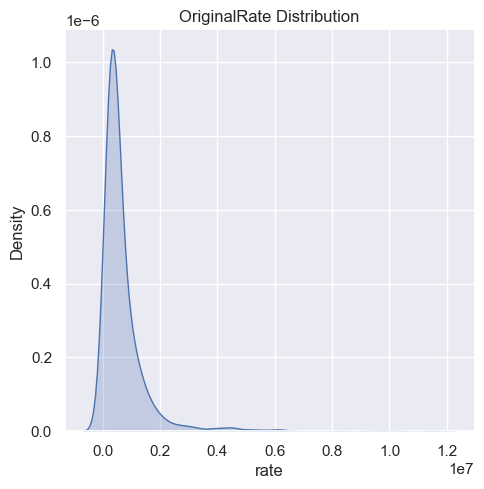

In [32]:
# Statistik Harga
print('Harga')
print(f'maximum value : {df.rate.max()}')
print(f'minimum value : {df.rate.min()}')
print(f'skew value : {round(df.rate.skew(), 2)}')

# Distribusi harga
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df, x="rate", kind="kde", fill=True).set(
    title='OriginalRate Distribution')
plt.show()

In [33]:
# Hitung outlier pada kolom rate
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1

print('Batas bawah :', Q1 - (1.5 * IQR))
print('Batas atas :', Q3 + (1.5 * IQR))

# Hitung jumlah outlier
total_outlier = len(df[(df['rate'] < (Q1 - (1.5 * IQR))) | (df['rate'] > (Q3 + (1.5 * IQR)))])
print('Jumlah outlier :', total_outlier)

Batas bawah : -502673.875
Batas atas : 1556801.125
Jumlah outlier : 91


In [34]:
# Hapus outlier
df = df[(df['rate'] > (Q1 - (1.5 * IQR))) & (df['rate'] < (Q3 + (1.5 * IQR)))]
df.describe()

,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
count,1.015000e+03,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,4.900464e+05,1.858128,2000.077833,22.072798,2.066010,6.599015,0.753695,0.284729,0.887685,0.456158,0.016749
std,3.242374e+05,1.554268,27.601540,9.015316,0.645556,2.969237,0.567377,0.451508,0.315910,0.498320,0.128392
min,8.264500e+04,0.000000,1937.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589530e+05,0.000000,2001.000000,16.000000,2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.719010e+05,2.000000,2012.000000,20.000000,2.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,6.118455e+05,3.000000,2015.000000,26.500000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.534866e+06,5.000000,2022.000000,72.000000,6.000000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000


Harga
maximum value : 1534866
minimum value : 82645
skew value : 1.31


<Figure size 1600x800 with 0 Axes>

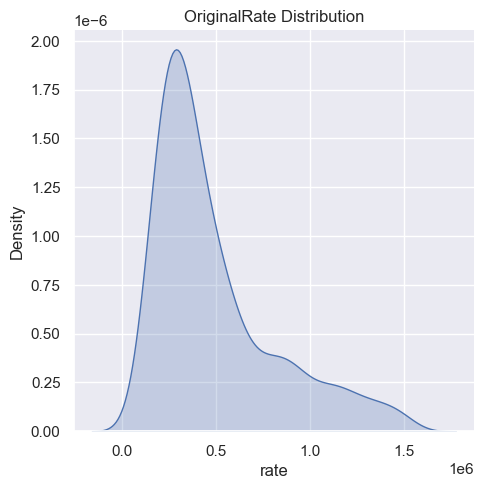

In [35]:
# Statistik Harga
print('Harga')
print(f'maximum value : {df.rate.max()}')
print(f'minimum value : {df.rate.min()}')
print(f'skew value : {round(df.rate.skew(), 2)}')

# Distribusi harga
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df, x="rate", kind="kde", fill=True).set(
    title='OriginalRate Distribution')
plt.show()

Size
maximum value : 72.0
minimum value : 3.0
skew value : 1.2163013252656778


<Figure size 1600x800 with 0 Axes>

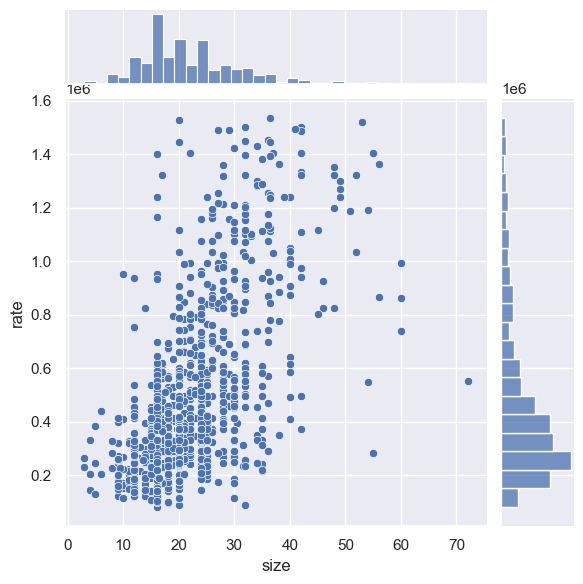

In [36]:
# Statistik Size
print('Size')
print('maximum value : {}'.format(df['size'].max()))
print('minimum value : {}'.format(df['size'].min()))
print('skew value : {}'.format(df['size'].skew()))

# Distribusi size
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='rate')
plt.show()

In [37]:
# Hasil data cleaning
print('Total baris data awal :', jumlah_baris_ori)
print('Total baris data yang dihapus :', jumlah_baris_ori - df.shape[0])
print('Total baris data setelah cleaning :', df.shape[0])

Total baris data awal : 1110
Total baris data yang dihapus : 95
Total baris data setelah cleaning : 1015


In [38]:
df.isnull().sum()

rate                       0
starRating                 0
builtYear                  0
size                       0
baseOccupancy              0
maxChildAge                0
maxChildOccupancy          0
isBreakfastIncluded        0
isWifiIncluded             0
isRefundable               0
hasLivingRoom              0
hotelFacilities            0
roomFacilities             0
nearestPointOfInterests    0
dtype: int64

# Encoding Data

In [39]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rate                     1015 non-null   int32  
 1   starRating               1015 non-null   int32  
 2   builtYear                1015 non-null   int32  
 3   size                     1015 non-null   float64
 4   baseOccupancy            1015 non-null   int64  
 5   maxChildAge              1015 non-null   int64  
 6   maxChildOccupancy        1015 non-null   int64  
 7   isBreakfastIncluded      1015 non-null   int64  
 8   isWifiIncluded           1015 non-null   int64  
 9   isRefundable             1015 non-null   int64  
 10  hasLivingRoom            1015 non-null   int64  
 11  hotelFacilities          1015 non-null   object 
 12  roomFacilities           1015 non-null   object 
 13  nearestPointOfInterests  1015 non-null   object 
dtypes: float64(1), int32(3),

## Check data format

In [40]:
df['hotelFacilities'].head(2)

0    ["CARPARK","COFFEE_SHOP","ELEVATOR","RESTAURAN...
1    ["CARPARK","COFFEE_SHOP","ELEVATOR","RESTAURAN...
Name: hotelFacilities, dtype: object

In [41]:
df['roomFacilities'].head(2)

0    ["AIR_CONDITIONING","BALCONY_TERRACE","BATHROB...
1    ["AIR_CONDITIONING","BALCONY_TERRACE","BATHROB...
Name: roomFacilities, dtype: object

In [42]:
df['nearestPointOfInterests'].head(2)

0    [{"landmarkId":"900000001343","geoId":null,"na...
1    [{"landmarkId":"900000001343","geoId":null,"na...
Name: nearestPointOfInterests, dtype: object

## Data Preprocessing

In [43]:
# create a MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

In [44]:
# reformat kolom hotelFacilities
df['hotelFacilities'] = df['hotelFacilities'].apply(eval)

# multi label binarizer untuk kolom hotelFacilities dengan preifx Hotel_
hotel_facilities = pd.DataFrame(mlb.fit_transform(
    df['hotelFacilities']), columns=[f'Hotel_{col}' for col in mlb.classes_])

hotelNewCol = hotel_facilities.shape[1]
print('Jumlah kolom :', hotel_facilities.shape[1])

# export hotel_facilities with pickle
hotelFacilities = hotel_facilities.columns.tolist()
pickle.dump(hotelFacilities, open('data/hotelFacilities.pkl', 'wb'))
    
hotel_facilities.head(2)

Jumlah kolom : 223


,Hotel_ACCESSIBILITY_EQUIPMENT,Hotel_ACCESSIBLE_BATHROOM,Hotel_ACCESSIBLE_PARKING,Hotel_ACCESSIBLE_PATH_OF_TRAVEL,Hotel_ACCESS_FRIENDLY,Hotel_AEROBICS,Hotel_AIRPORT_TRANSFER,Hotel_AIRPORT_TRANSFER_SURCHARGE,Hotel_AIR_CONDITIONING,Hotel_AIR_CONDITIONING_IN_RESTAURANT,...,Hotel_VOLLEYBALL,Hotel_WATERSLIDE,Hotel_WATER_SPORT,Hotel_WEDDING_SERVICE,Hotel_WHEELCHAIR_ACCESSIBLE,Hotel_WIFI_FREE,Hotel_WIFI_PUBLIC_AREA,Hotel_WIFI_PUBLIC_AREA_SURCHARGE,Hotel_WIFI_SURCHARGE,Hotel_WINERY
0,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,0,0


In [45]:
# reformat kolom roomFacilities
df['roomFacilities'] = df['roomFacilities'].apply(eval)

# multi label binarizer untuk kolom roomFacilities dengan preifx Room_
room_facilities = pd.DataFrame(mlb.fit_transform(df['roomFacilities']), columns=[
                               f'Room_{col}' for col in mlb.classes_])

roomNewCol = room_facilities.shape[1]
print('Jumlah kolom :', roomNewCol)

# export room_facilities with pickle
roomFacilities = room_facilities.columns.tolist()
pickle.dump(roomFacilities, open('data/roomFacilities.pkl', 'wb'))

room_facilities.head(2)

Jumlah kolom : 70


,Room_AIR_CONDITIONING,Room_BALCONY,Room_BALCONY_TERRACE,Room_BATHROBES,Room_BATHTUB,Room_BLACKOUT_CURTAINS,Room_BLACKOUT_DRAPES_CURTAINS,Room_CLOTHES_DRYER,Room_COFFEE_TEA_MAKER,Room_COMPLIMENTARY_BOTTLED_WATER,...,Room_SLIPPERS,Room_SOUNDPROOFED_ROOMS,Room_TELEVISION,Room_TELEVISION_LCD_PLASMA_SCREEN,Room_TOILETRIES,Room_TOWELS_PROVIDED,Room_TURNDOWN_SERVICE,Room_TWENTY_FOUR_HOUR_ROOM_SERVICE,Room_WHEELCHAIR_ACCESSIBLE,Room_WIFI_SURCHARGE
0,1,0,1,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [46]:
# reformat kolom nearestPointOfInterests
df['nearestPointOfInterests'] = df['nearestPointOfInterests'].apply(
    lambda x: [item['landmarkType'] for item in json.loads(x)])

# multi label binarizer untuk kolom nearestPointOfInterests dengan preifx Point_
pointOfInterests = pd.DataFrame(mlb.fit_transform(
    df['nearestPointOfInterests']), columns=[f'Point_{col}' for col in mlb.classes_])

pointNewCol = pointOfInterests.shape[1]
print('Jumlah kolom :', pointNewCol)

# export pointOfInterests with pickle
pointInterests = pointOfInterests.columns.tolist()
pickle.dump(pointInterests, open('data/pointInterests.pkl', 'wb'))

pointOfInterests.head(2)

Jumlah kolom : 15


,Point_AIRPORT,Point_ATTRACTION,Point_BEACH,Point_HOSPITAL,Point_MONUMENT,Point_MUSEUM,Point_OFFICIAL_BUILDING,Point_OTHERS,Point_PLACE_OF_WORSHIP,Point_RESTAURANT,Point_SCHOOL,Point_SHOPPING_AREA,Point_STORE,Point_TERMINAL,Point_TRAIN_STATION
0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


## Menggabungkan hasil encoding

In [47]:
# Total kolom encoding
totalNewCol = hotelNewCol + roomNewCol + pointNewCol
print('Total kolom encoding :', totalNewCol)

Total kolom encoding : 308


In [48]:
# menghapus kolom hotelFacilities, roomFacilities, dan nearestPointOfInterests
df = df.drop(columns=['hotelFacilities', 'roomFacilities', 'nearestPointOfInterests'])

print('df shape :', df.shape)
print('hotel_facilities shape :', hotel_facilities.shape)
print('room_facilities shape :', room_facilities.shape)
print('pointOfInterests shape :', pointOfInterests.shape)

df = pd.concat([df, hotel_facilities, room_facilities,
               pointOfInterests], axis=1)
df.head()

df shape : (1015, 11)
hotel_facilities shape : (1015, 223)
room_facilities shape : (1015, 70)
pointOfInterests shape : (1015, 15)


,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,...,Point_MUSEUM,Point_OFFICIAL_BUILDING,Point_OTHERS,Point_PLACE_OF_WORSHIP,Point_RESTAURANT,Point_SCHOOL,Point_SHOPPING_AREA,Point_STORE,Point_TERMINAL,Point_TRAIN_STATION
0,1008264,5,2013,40.0,2,8,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
1,1049587,5,2013,40.0,2,8,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
2,1521212,4,2013,53.0,2,5,1,1,1,1,...,1,0,0,0,1,0,0,1,0,0
3,696969,4,2013,24.0,2,5,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
4,927273,4,2013,28.0,2,5,1,1,1,1,...,1,0,0,0,1,0,0,1,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Columns: 319 entries, rate to Point_TRAIN_STATION
dtypes: float64(1), int32(311), int64(7)
memory usage: 1.3 MB


# Export Data ke CSV

In [50]:
df.to_csv('dataset/sk2/kamar-hotel-yogyakarta.csv', index=False)

In [51]:
col = df.columns

# export col with pickle
pickle.dump(col, open('data/col.pkl', 'wb'))

In [52]:
print(col)

Index(['rate', 'starRating', 'builtYear', 'size', 'baseOccupancy',
       'maxChildAge', 'maxChildOccupancy', 'isBreakfastIncluded',
       'isWifiIncluded', 'isRefundable',
       ...
       'Point_MUSEUM', 'Point_OFFICIAL_BUILDING', 'Point_OTHERS',
       'Point_PLACE_OF_WORSHIP', 'Point_RESTAURANT', 'Point_SCHOOL',
       'Point_SHOPPING_AREA', 'Point_STORE', 'Point_TERMINAL',
       'Point_TRAIN_STATION'],
      dtype='object', length=319)


# Data Anlisis

starRating
0    305
3    225
2    161
1    147
4    143
5     34
Name: count, dtype: int64


C:\Users\wilda\AppData\Local\Temp\ipykernel_6252\940009879.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_percentage.index, y=value_percentage.values,


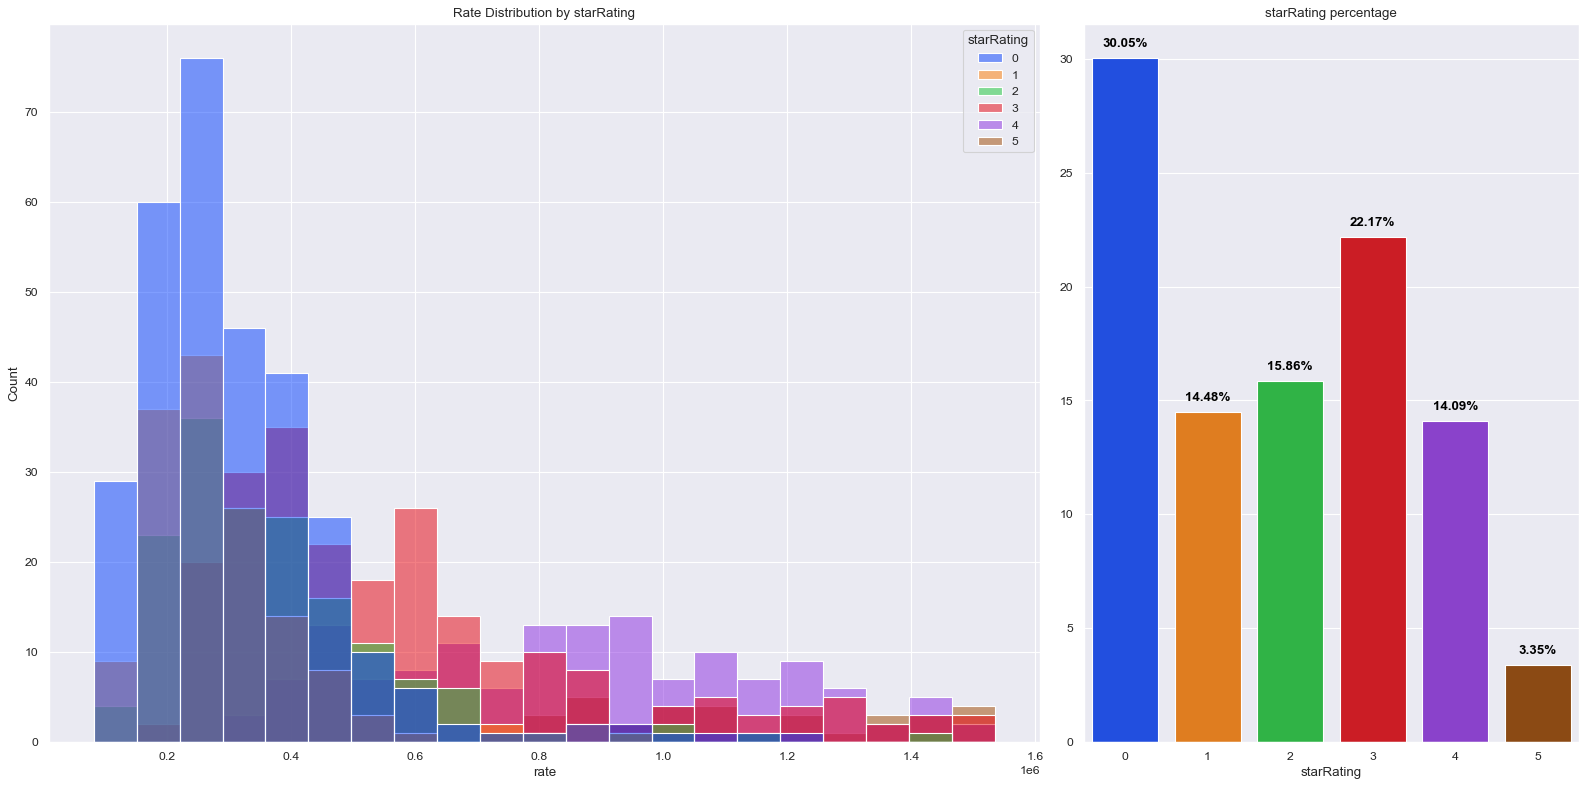

In [53]:
value = df.starRating.value_counts()
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i)
                         for i in range(len(value_percentage))]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df, x="rate", hue='starRating', palette='bright',
             ax=ax[0]).set(title='Rate Distribution by starRating')

sns.barplot(x=value_percentage.index, y=value_percentage.values,
            palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for i, (v, index) in enumerate(value_percentage_list_sorted):
    ax[1].text(index, v + 0.5, str(round(v, 2)) + '%',
               color='black', fontweight='bold', ha='center')

fig.tight_layout()

Skew value for every starRating
starRating
0    2.167239
1    2.119075
2    1.963175
3    1.234573
4    0.136950
5    0.172502
Name: rate, dtype: float64


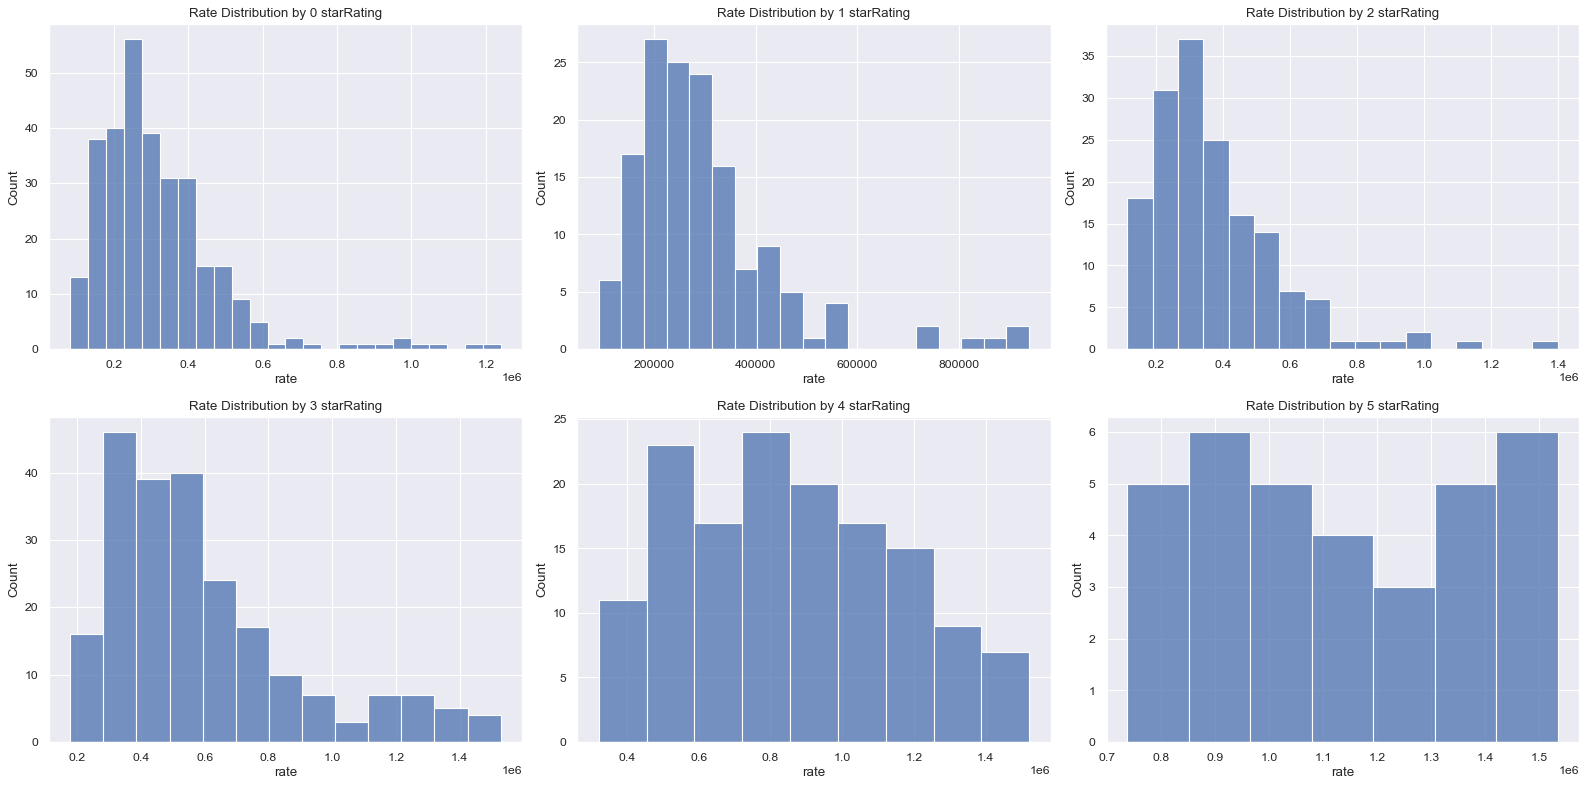

In [54]:
filtered_0 = df[df['starRating'] == 0.0]
filtered_1 = df[df['starRating'] == 1.0]
filtered_2 = df[df['starRating'] == 2.0]
filtered_3 = df[df['starRating'] == 3.0]
filtered_4 = df[df['starRating'] == 4.0]
filtered_5 = df[df['starRating'] == 5.0]

print('Skew value for every starRating')
print(df.groupby('starRating')['rate'].skew())

# OriginalRate Distribution by starRating using hisplot inside subplot
fig, ax = plt.subplots(2, 3, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 1, 1]})
sns.histplot(filtered_0, x="rate", ax=ax[0, 0]).set(
    title='Rate Distribution by 0 starRating')
sns.histplot(filtered_1, x="rate", ax=ax[0, 1]).set(
    title='Rate Distribution by 1 starRating')
sns.histplot(filtered_2, x="rate", ax=ax[0, 2]).set(
    title='Rate Distribution by 2 starRating')
sns.histplot(filtered_3, x="rate", ax=ax[1, 0]).set(
    title='Rate Distribution by 3 starRating')
sns.histplot(filtered_4, x="rate", ax=ax[1, 1]).set(
    title='Rate Distribution by 4 starRating')
sns.histplot(filtered_5, x="rate", ax=ax[1, 2]).set(
    title='Rate Distribution by 5 starRating')
fig.tight_layout()

In [55]:
# Statistik Harga tiap rating bintang hotel

dfRateStat = df.groupby('starRating').agg(
    {'rate': ['mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]})

# change the column name from index 4 and 6
dfRateStat = dfRateStat.rename(
    columns={'<lambda_0>': '25%', '<lambda_1>': '75%'})
dfRateStat

rate                                                       \
                    mean            std     min      max       25%     median   
starRating                                                                      
0           3.191067e+05  171570.704430   82645  1239669  206612.0   289256.0   
1           2.972719e+05  149305.342175   90909   938609  206612.0   264463.0   
2           3.785267e+05  195403.723931  114876  1399537  247934.0   329752.0   
3           5.947459e+05  305081.185819  177686  1528926  371901.0   516529.0   
4           8.620919e+05  302233.532163  321395  1521212  613572.5   846281.0   
5           1.127378e+06  247495.951682  736969  1534866  909555.0  1103609.0   

                       
                  75%  
starRating             
0            371901.0  
1            330579.0  
2            455988.0  
3            709703.0  
4           1102204.0  
5           1368749.0

# Pemodelan Machine Learning

In [56]:
import numpy as np
import xgboost as xgb
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display

In [57]:

# separate the feature and target
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

# splitting data into data train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

trainRatio = round(x_train.shape[0]/len(df), 2)*100
testRatio = round(x_test.shape[0]/len(df), 2)*100

print(f'Train set: {x_train.shape[0]} ({trainRatio}%)')
print(f'Test set: {x_test.shape[0]} ({testRatio}%)')

Train set: 812 (80.0%)
Test set: 203 (20.0%)


In [58]:

xgReg = xgb.XGBRegressor(           # Berikut adalah parameter default dari XGBRegressor,   jika tidak diberikan parameter maka akan menggunakan parameter tersebut.
    objective='reg:squarederror',
    eval_metric='rmse',
)

svr = SVR(
    cache_size=1500,
)

rf = RandomForestRegressor()

scoring = ['neg_mean_squared_error','r2']

## train and evaluate model

In [59]:

xgReg.fit(x_train, y_train, verbose=False)

print('Train evaluation')
preds = xgReg.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_train, preds), 3))
print('-'*20)

print('Test evaluation')
preds = xgReg.predict(x_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_test, preds), 3))

svr.fit(x_train, y_train)

print('Train evaluation')
preds = svr.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_train, preds), 3))
print('-'*20)

print('Test evaluation')
preds = svr.predict(x_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_test, preds), 3))

rf.fit(x_train, y_train)

print('Train evaluation')
preds = rf.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_train, preds), 3))
print('-'*20)

print('Test evaluation')
preds = rf.predict(x_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_test, preds), 3))

Train evaluation
RMSE:  37,384
R2:  0.987
--------------------
Test evaluation
RMSE:  149,468
R2:  0.747
Train evaluation
RMSE:  351,746
R2:  -0.133
--------------------
Test evaluation
RMSE:  316,261
R2:  -0.132
Train evaluation
RMSE:  69,315
R2:  0.956
--------------------
Test evaluation
RMSE:  149,474
R2:  0.747


## Select Parameters for Tuning

In [60]:

xgParams = {
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
    'learning_rate': [0.01, 0.05, 0.1,],
    'max_depth': np.arange(3,30,10),
    'reg_alpha': np.arange(0,5,1),
    'reg_lambda': np.arange(0,5,1),
    'subsample': [0.5, 0.6, 0.7, 0.8],
}

svrParams = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [ 1000, 10000, 25000, 50000],
}

rfParams = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

## Tuning Parameter XGB Model

n_iterations: 5
n_required_iterations: 8
n_possible_iterations: 5
min_resources_: 6
max_resources_: 812
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3600
n_resources: 6
Fitting 3 folds for each of 3600 candidates, totalling 10800 fits
----------
iter: 1
n_candidates: 1200
n_resources: 18
Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
----------
iter: 2
n_candidates: 400
n_resources: 54
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
----------
iter: 3
n_candidates: 134
n_resources: 162
Fitting 3 folds for each of 134 candidates, totalling 402 fits
----------
iter: 4
n_candidates: 45
n_resources: 486
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Train evaluation
RMSE:  161,127
R2:  0.76
--------------------
Test evaluation
RMSE:  174,616
R2:  0.65
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 13, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


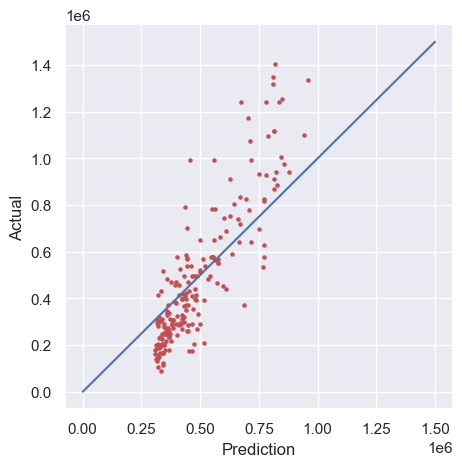

In [61]:

# Array for evaluation of models
MODEL = []
TEST = []
TRAIN = []

def eval(model,testR2, testRMSE,trainR2, trainRMSE):
    MODEL.append(model)
    TEST.append({'r2': round(testR2, 2), 'rmse': testRMSE})
    TRAIN.append({'r2': round(trainR2, 2), 'rmse': trainRMSE})

gridXGB = HalvingGridSearchCV(
    xgReg, 
    param_grid=xgParams,
    cv=3, 
    n_jobs=-1,
    verbose=3,
    scoring='neg_mean_squared_error',
    refit=True,
    random_state=123,
)
gridXGB.fit(x_train, y_train)

print('Train evaluation')
preds = gridXGB.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmseTrain = np.sqrt(mse)
r2Train = round(r2_score(y_train, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTrain))
print('R2: ', r2Train)
print('-'*20)

print('Test evaluation')
preds = gridXGB.predict(x_test)
mseTest = mean_squared_error(y_test, preds)
rmseTest = np.sqrt(mseTest)
r2Test = round(r2_score(y_test, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTest))
print('R2: ', r2Test)

eval('XGBRegressor', r2Test, rmseTest, r2Train, rmseTrain)

print(gridXGB.best_params_)

plt.figure(figsize=(5, 5))
plt.scatter(preds, y_test, color='r', s=5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot([0, 15e5], [0, 15e5])
plt.savefig('img/XGBprediction.png', bbox_inches='tight', dpi=400)
plt.show()


## Tuning Parameter Random Forest Model

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 6
max_resources_: 812
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 675
n_resources: 6
Fitting 3 folds for each of 675 candidates, totalling 2025 fits
----------
iter: 1
n_candidates: 225
n_resources: 18
Fitting 3 folds for each of 225 candidates, totalling 675 fits
----------
iter: 2
n_candidates: 75
n_resources: 54
Fitting 3 folds for each of 75 candidates, totalling 225 fits
----------
iter: 3
n_candidates: 25
n_resources: 162
Fitting 3 folds for each of 25 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 9
n_resources: 486
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Train evaluation
RMSE:  70,638
R2:  0.95
--------------------
Test evaluation
RMSE:  152,174
R2:  0.74


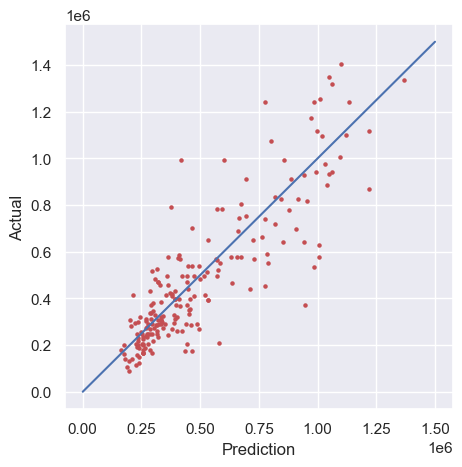

In [62]:
gridRF = HalvingGridSearchCV(
    rf,
    param_grid=rfParams,
    cv=3, 
    n_jobs=-1,
    verbose=3,
    scoring='neg_mean_squared_error',
    refit=True,
    random_state=123
)
gridRF.fit(x_train, y_train)

print('Train evaluation')
preds = gridRF.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmseTrain = np.sqrt(mse)
r2Train = round(r2_score(y_train, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTrain))
print('R2: ', r2Train)
print('-'*20)

print('Test evaluation')
preds = gridRF.predict(x_test)
mseTest = mean_squared_error(y_test, preds)
rmseTest = np.sqrt(mseTest)
r2Test = round(r2_score(y_test, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTest))
print('R2: ', r2Test)

eval('RandomForest Regressor', r2Test, rmseTest, r2Train, rmseTrain)

plt.figure(figsize=(5, 5))
plt.scatter(preds, y_test, color='r', s=5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot([0, 15e5], [0, 15e5])
plt.savefig('img/RFprediction.png', bbox_inches='tight', dpi=400)
plt.show()


## Tuning Parameter SVR Model

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 90
max_resources_: 812
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 90
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 1
n_candidates: 6
n_resources: 270
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 2
n_resources: 810
Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'C': 10000, 'kernel': 'linear'}
Train evaluation
RMSE:  165,899
R2:  0.75
--------------------
Test evaluation
RMSE:  165,886
R2:  0.69


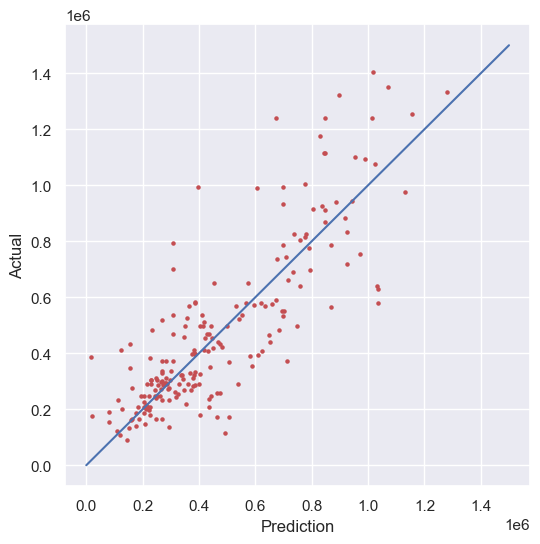

In [63]:

gridSVR = HalvingGridSearchCV(
    svr,
    param_grid=svrParams,
    cv=3,
    n_jobs=-1,
    verbose=3,
    scoring='neg_mean_squared_error',
    refit=True,
)
gridSVR.fit(x_train, y_train)
print(gridSVR.best_params_)

print('Train evaluation')
preds = gridSVR.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmseTrain = np.sqrt(mse)
r2Train = round(r2_score(y_train, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTrain))
print('R2: ', r2Train)
print('-'*20)

print('Test evaluation')
preds = gridSVR.predict(x_test)
mseTest = mean_squared_error(y_test, preds)
rmseTest = np.sqrt(mseTest)
r2Test = round(r2_score(y_test, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTest))
print('R2: ', r2Test)

eval('SVR', r2Test, rmseTest, r2Train, rmseTrain)

plt.figure(figsize=(6, 6))
plt.scatter(preds, y_test, color='r', s=5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot([0, 15e5], [0, 15e5])
plt.savefig('img/SVRprediction.png', bbox_inches='tight', dpi=400)
plt.show()

## Open plot from Picture folder

XGBRegressor prediction


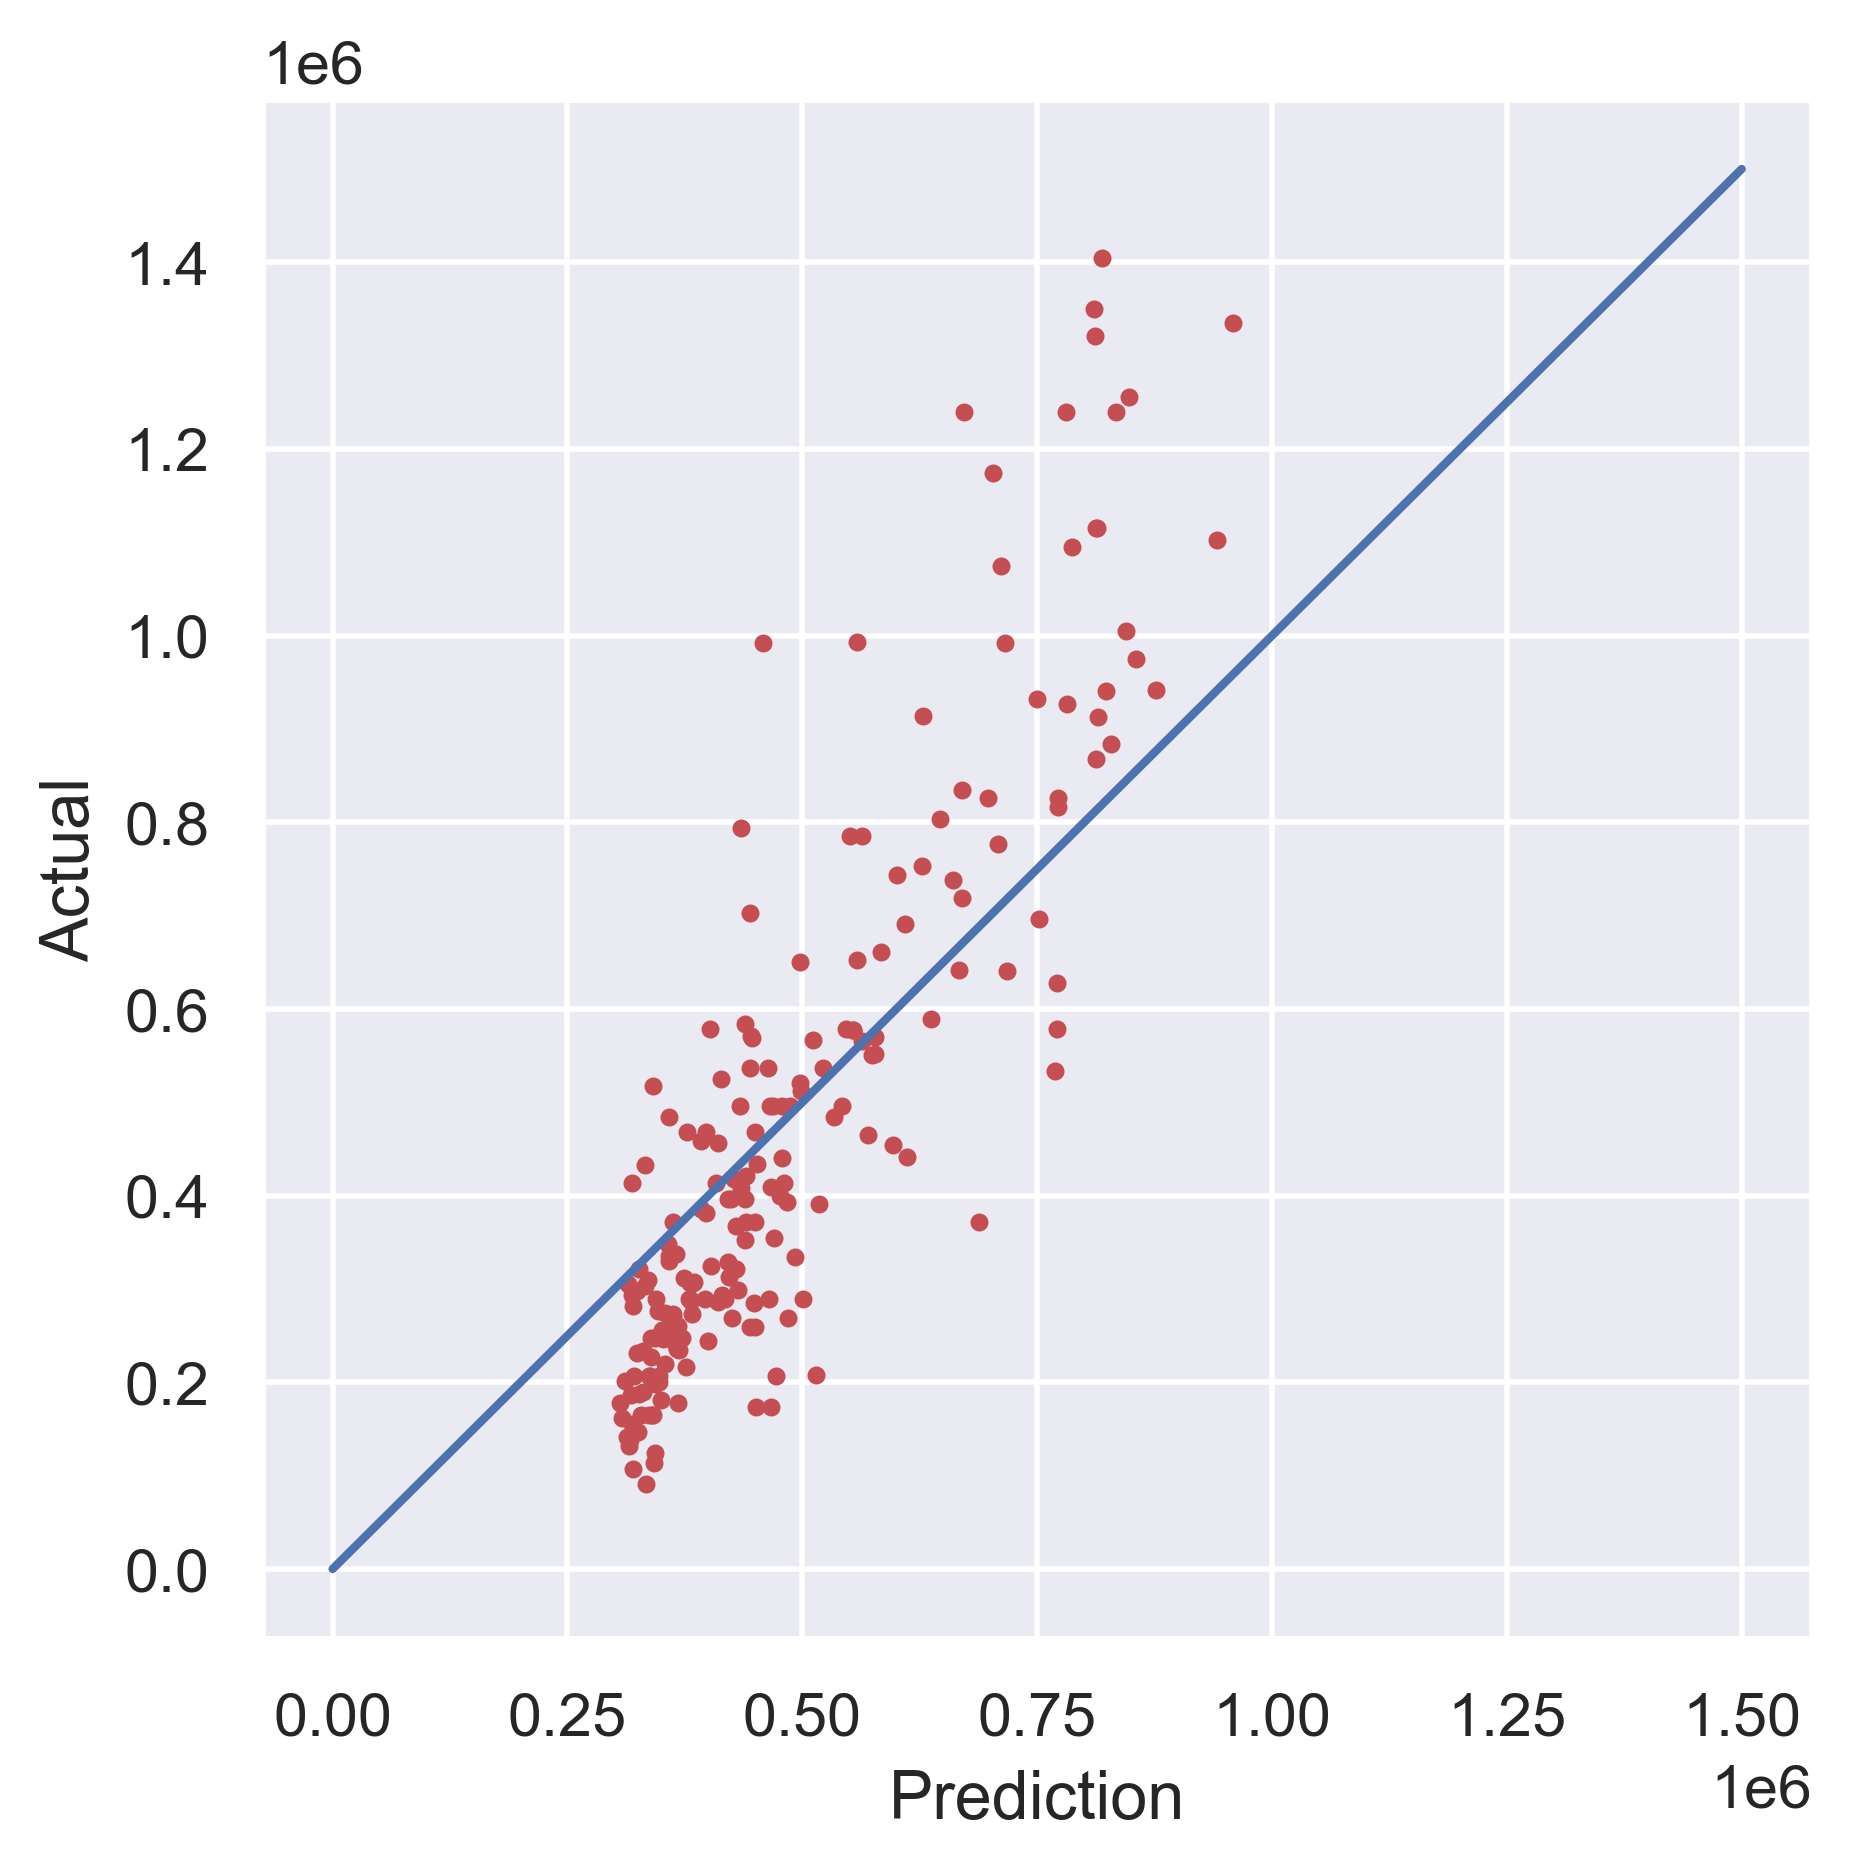

In [64]:
print('XGBRegressor prediction')
display.Image('img/XGBprediction.png', width=600, height=600)

RandomForest Regressor prediction


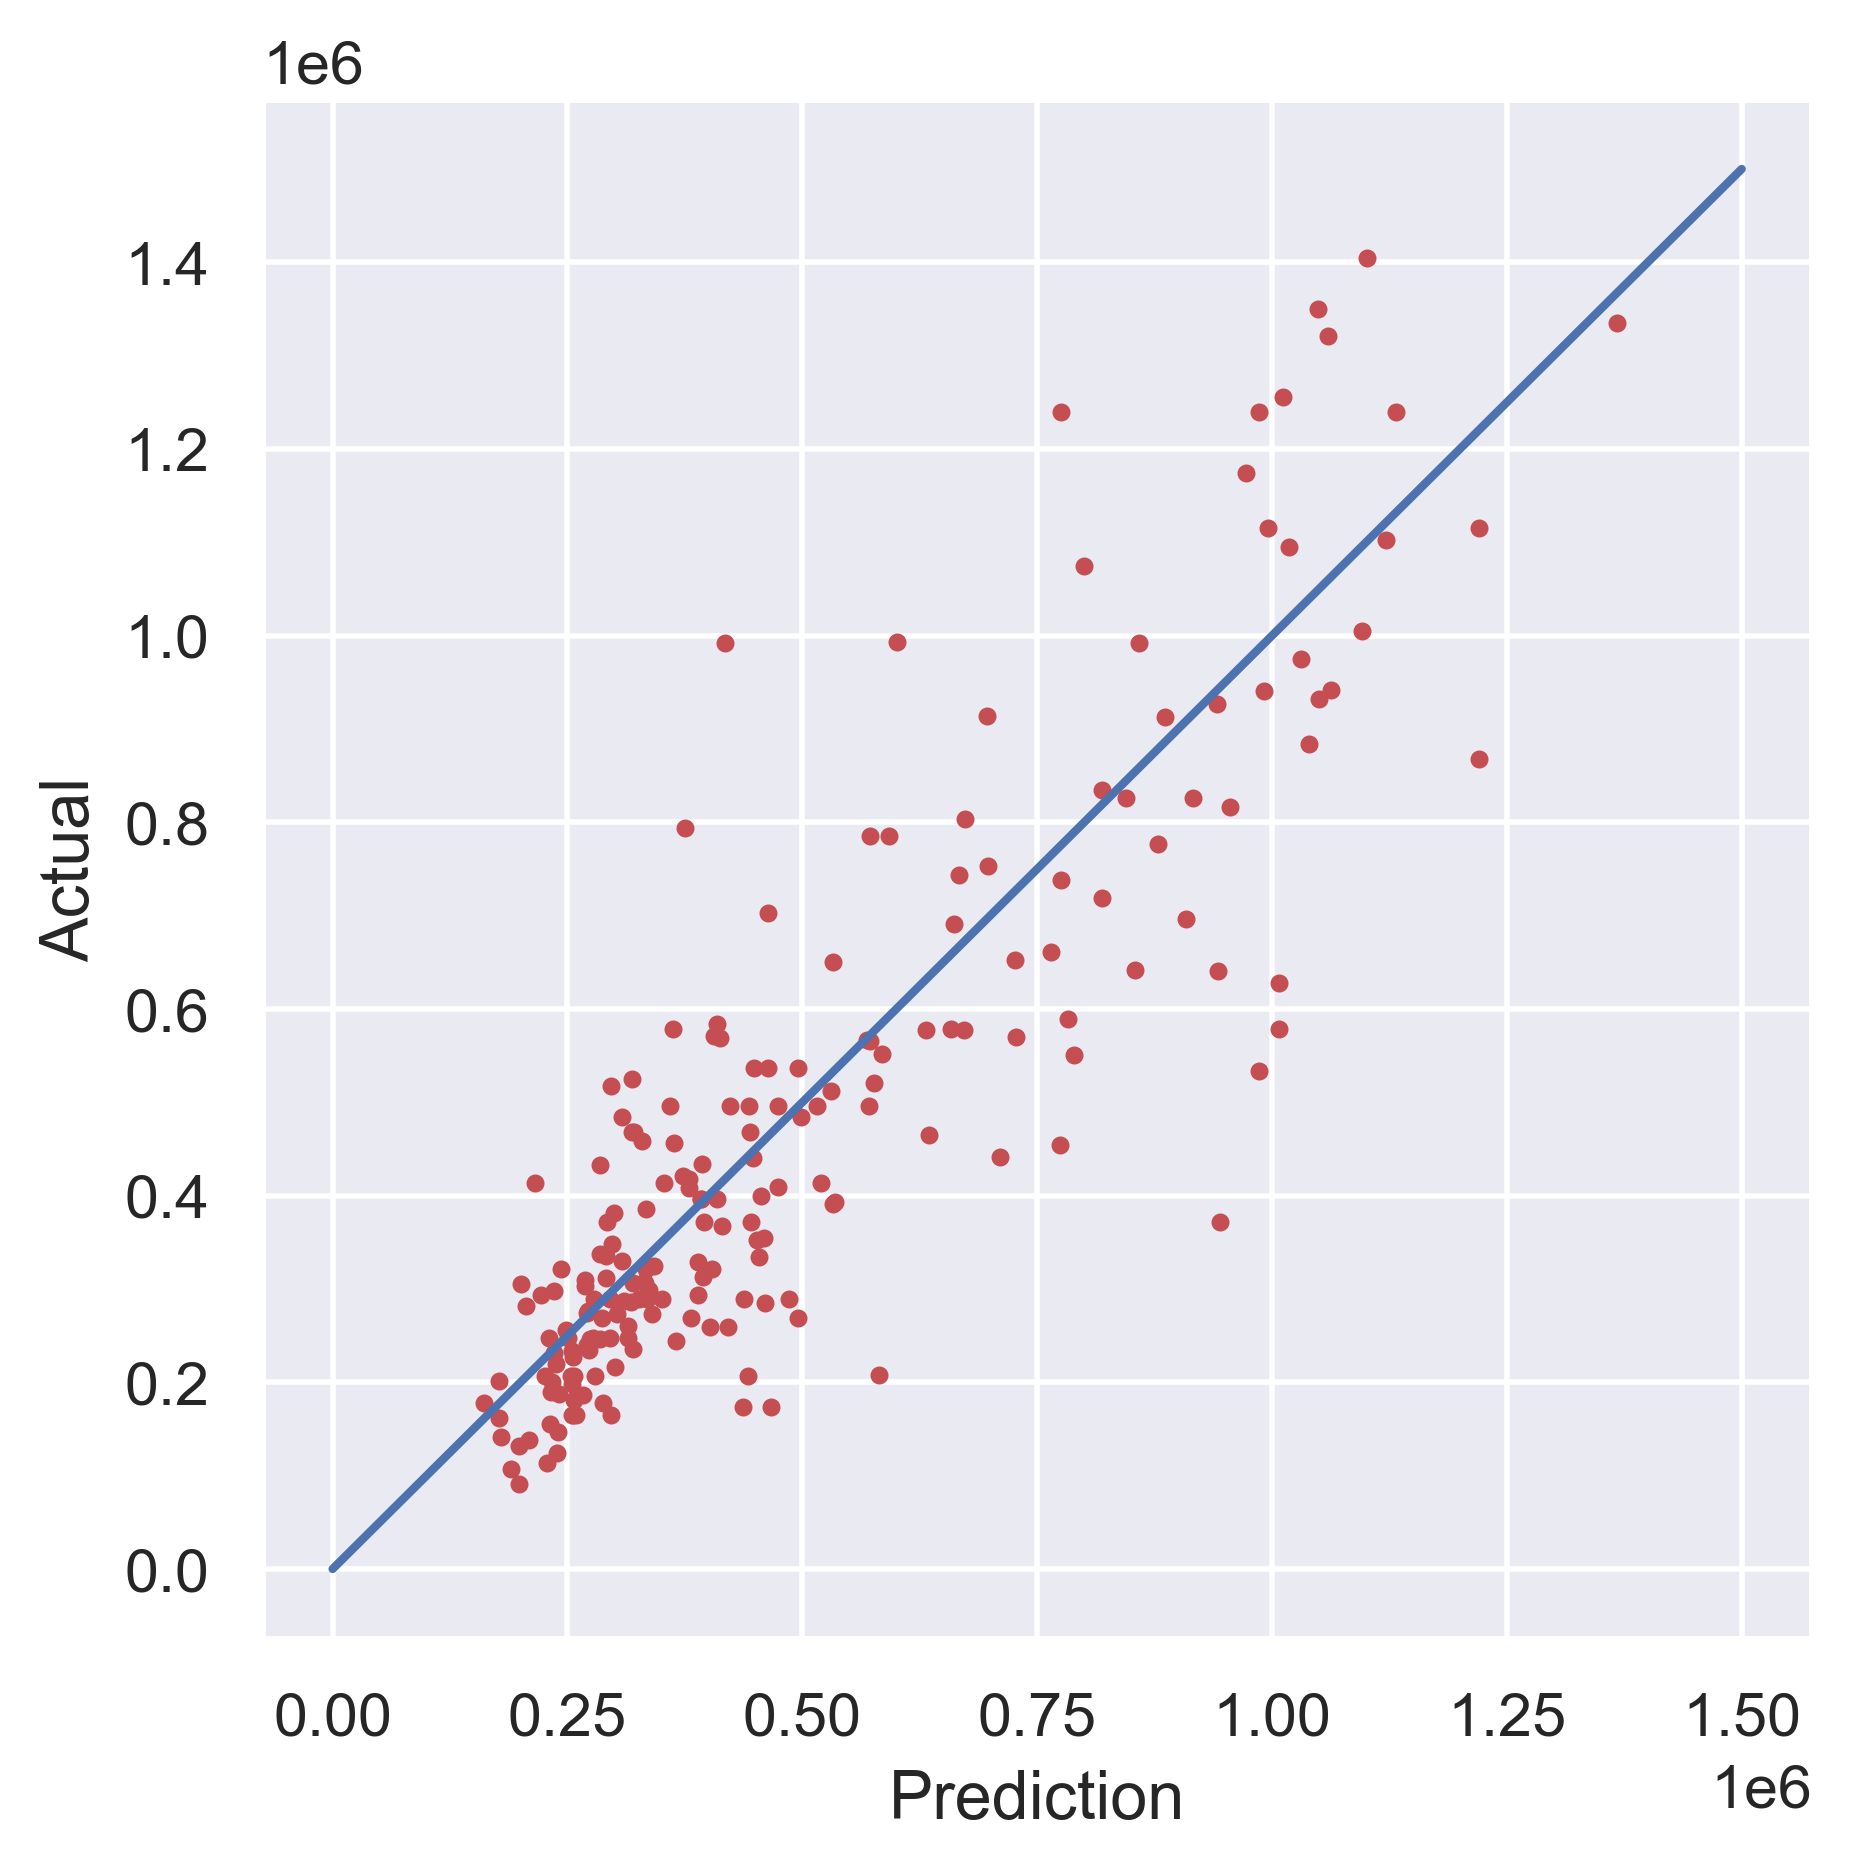

In [65]:
print('RandomForest Regressor prediction')
display.Image('img/RFprediction.png', width=600, height=600)

SVR prediction


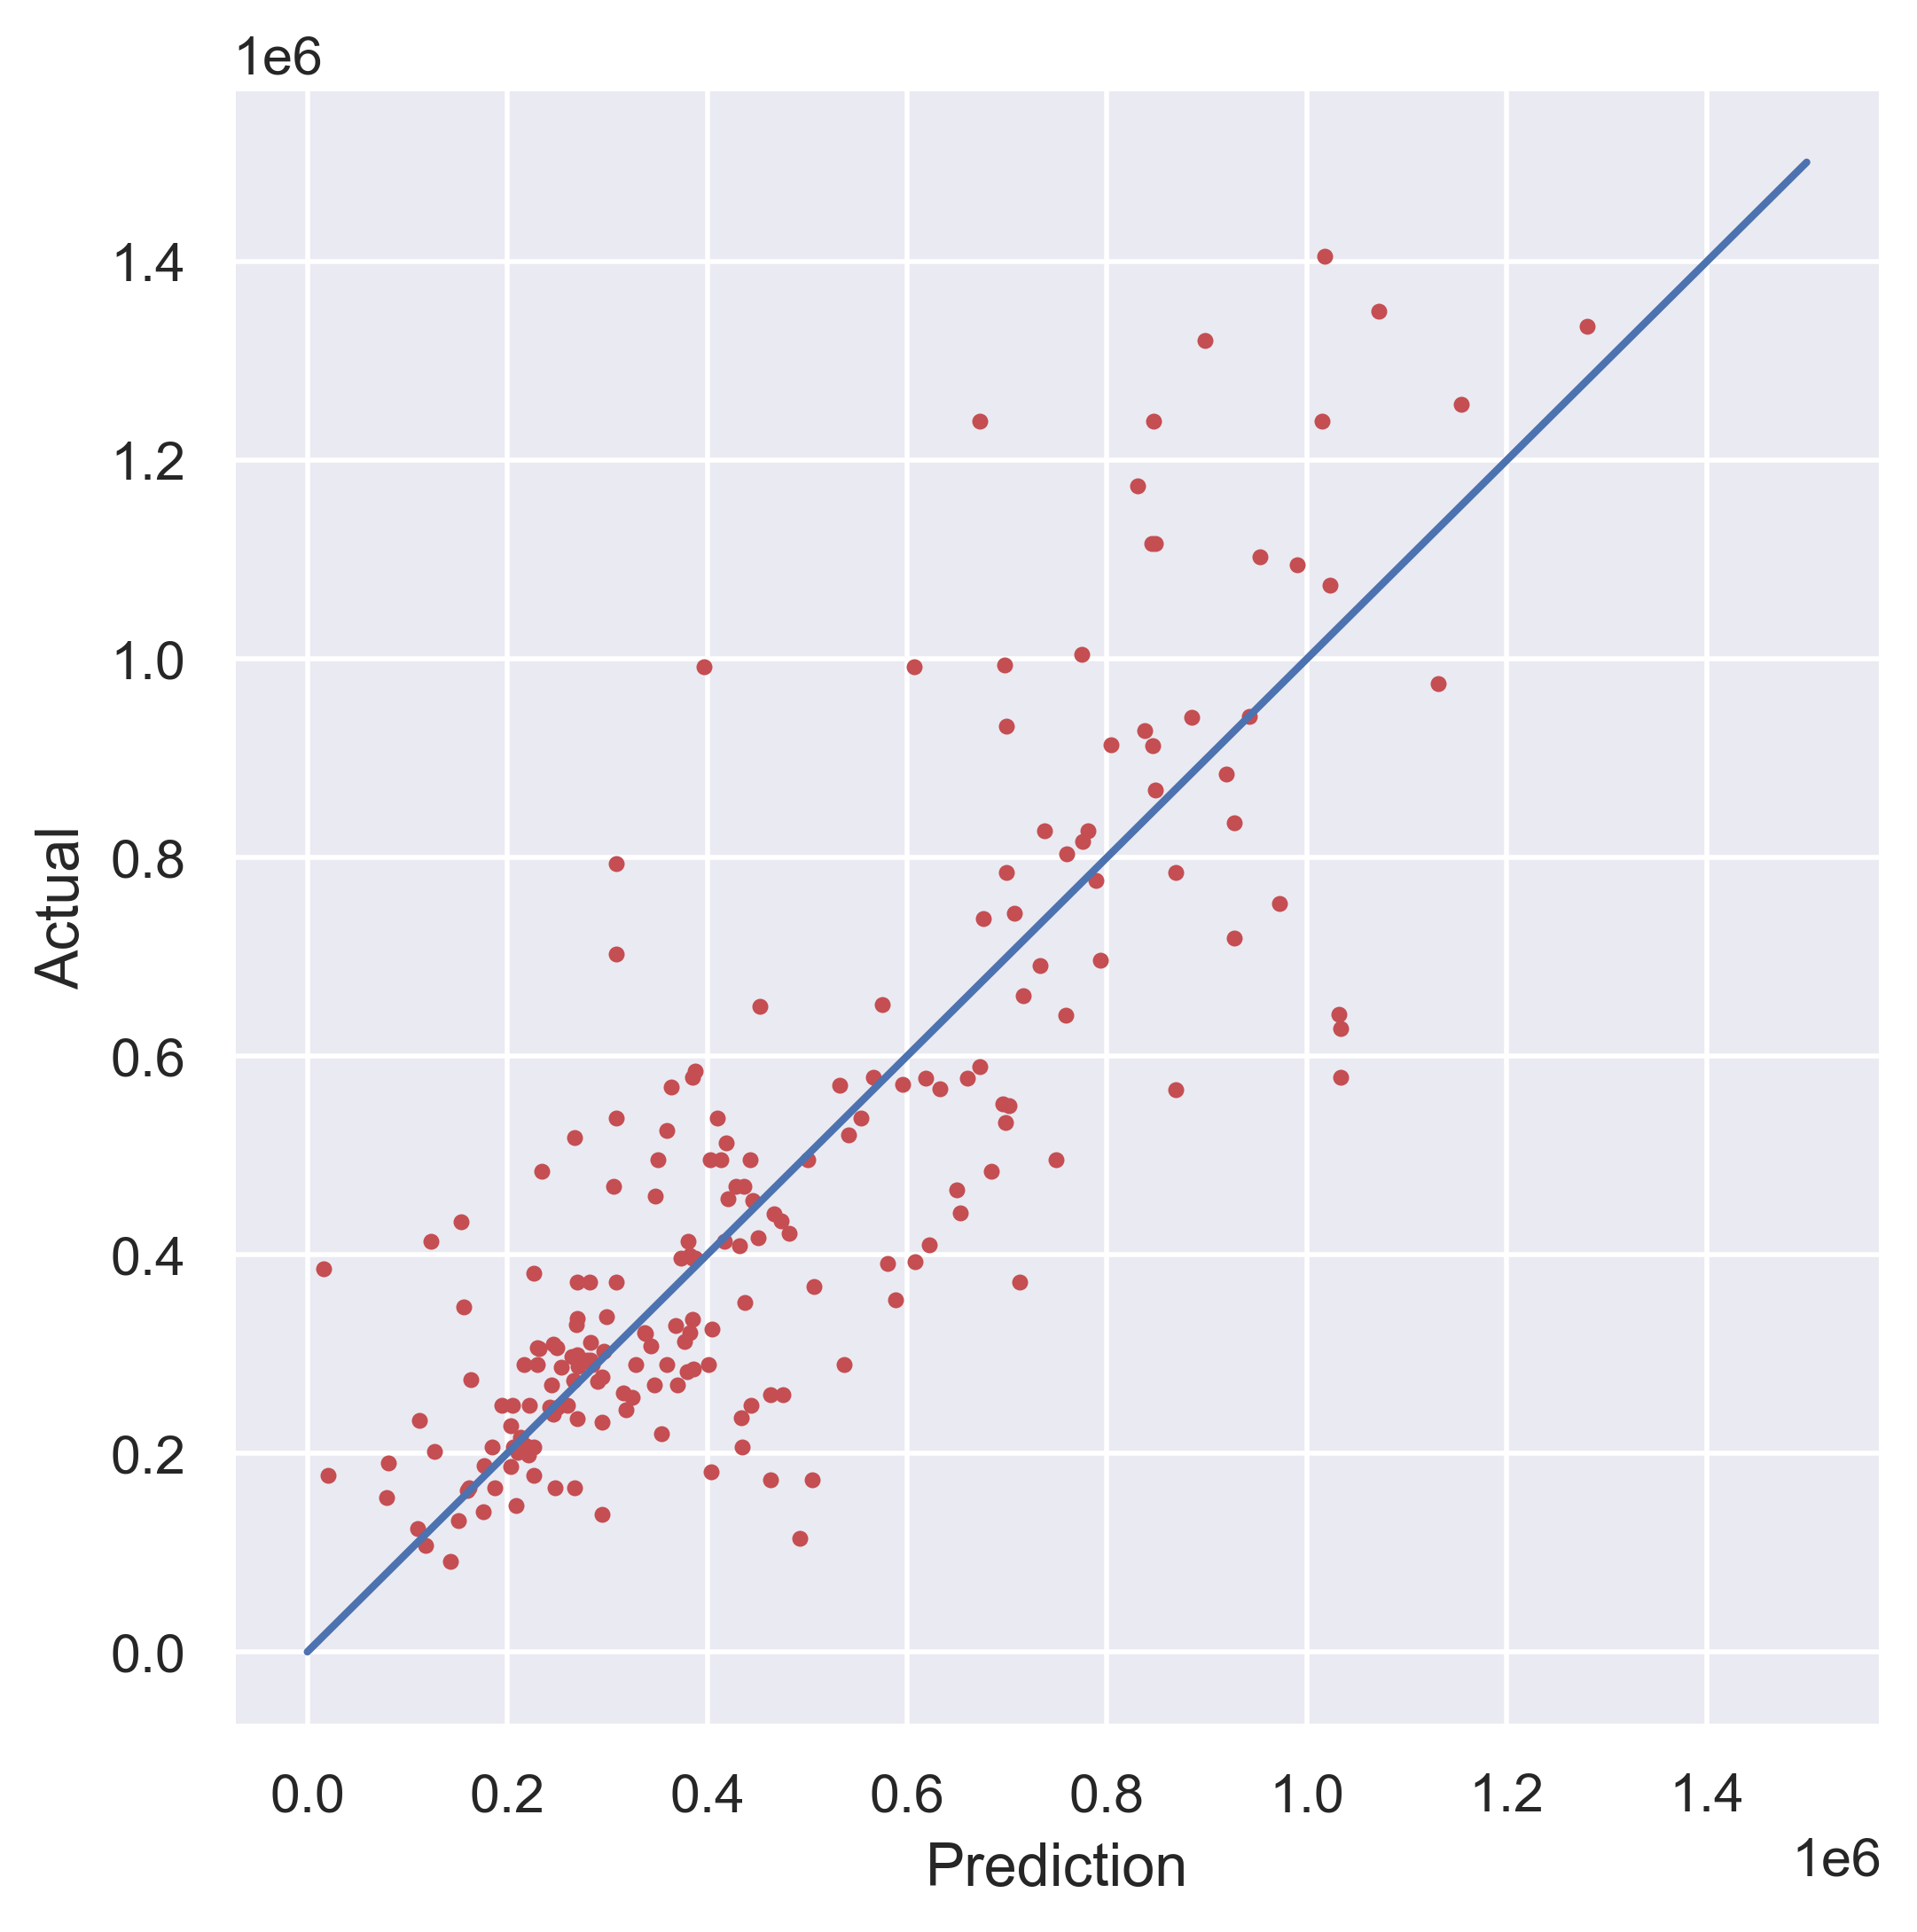

In [66]:
print('SVR prediction')
display.Image('img/SVRprediction.png', width=600, height=600)

## Refit The Model With The Best Parameters Into Best Model

In [67]:
# refit the model with the best parameters into bestModel
xgbModel = gridXGB.best_estimator_.fit(x_train, y_train)
svrModel = gridSVR.best_estimator_.fit(x_train, y_train)
rfModel = gridRF.best_estimator_.fit(x_train, y_train)

## export The Models


In [68]:
with open('Model/xgbModel.pkl', 'wb') as file:
    pickle.dump(xgbModel, file)
with open('Model/svrModel.pkl', 'wb') as file:
    pickle.dump(svrModel, file)
with open('Model/rfModel.pkl', 'wb') as file:
    pickle.dump(rfModel, file)

## Statistik Data



In [69]:
evalData = {
    'Model': MODEL,
    'Test R2': [d['r2'] for d in TEST],
    'Test RMSE': [d['rmse'] for d in TEST],
    'Train R2': [d['r2'] for d in TRAIN],
    'Train RMSE': [d['rmse'] for d in TRAIN]
}

df_eval = pd.DataFrame(evalData)
df_eval.sort_values(by='Test RMSE', ascending=True)

,Model,Test R2,Test RMSE,Train R2,Train RMSE
1,RandomForest Regressor,0.74,152173.669451,0.95,70638.321794
2,SVR,0.69,165885.908731,0.75,165898.855824
0,XGBRegressor,0.65,174615.875363,0.76,161126.571635


# Deployment

In [70]:
import streamlit as st
import pandas as pd
import sqlite3
import pickle
import time
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [71]:

# load file with pickle and read binaruy 
hotelFacilities = pickle.load(open('data/hotelFacilities.pkl','rb'))
roomFacilities = pickle.load(open('data/roomFacilities.pkl','rb'))
nearestPoint = pickle.load(open('data/pointInterests.pkl','rb'))
colOri = pickle.load(open('data/col.pkl','rb'))

# load model from pikcle 
xgbModel = pickle.load(open('Model/xgbModel.pkl','rb'))
svrModel = pickle.load(open('Model/svrModel.pkl','rb'))
rfModel = pickle.load(open('Model/rfModel.pkl','rb'))


In [72]:
# mengatur konfigurasi halaman
st.set_page_config(
    page_title = "Estimasi Hotel Yogyakarta",
    page_icon = ':hotel' #nama emoji
)

# st.write dapat digunakan menampilkan test,dataframe,visualisasi
st.title('Yogyakarta Hotel Price Estimation')
st.write('for mor ingo about blablabal')

# st.sidebar dapat digunakan untuk membuat sidebar
st.sidebar.header("User Input Features")

# Input User untuk memasukkan elemen input use dalam sidebar dilakukan
# dengan st.sidebar.slider,st.sidebar.selectbox dll

def user_input_features():
    starRating = st.sidebar.slider('Star Rating',0,5,3) #(label,minvalues,maxvalues,initial values)
    builtYear = st.sidebar.slider('Built Year',1900,2023,1960)
    size = st.sidebar.slider("Room Size (m2)",2.0,100.0,50.0,0.1,format='%0.1f')#(label,minvalues,maxvalues,initial values,jarak increment,format spesifik)
    occupancy = st.sidebar.slider('Occupancy',1,5,3)
    childAge = st.sidebar.slider('Child Age',0,18,9)
    childOccupancy = st.sidebar.slider('Child Occupancy',0,5,2)
    breakfast = st.sidebar.checkbox('Breakfast Include')
    wifi = st.sidebar.checkbox("Wifi Include")
    refund = st.sidebar.checkbox('Refund')
    livingRoom = st.sidebar.checkbox('Living Room')
    hotelFacilitie = st.sidebar.multiselect('Hotel Facilities',(hotelFacilities))
    roomFacilitie = st.sidebar.multiselect('Room Faciclities', (roomFacilities))
    pointInterest = st.sidebar.multiselect('Point of Interest',(nearestPoint))

    # handle checkbox
    breakfast = 1 if breakfast else 0
    wifi = 1 if wifi else 0
    refund = 1 if refund else 0
    livingRoom = 1 if livingRoom else 0

    # handle MultiSelect
    hotelFacilitie = ','.join(hotelFacilitie)
    roomFacilitie = ','.join(roomFacilitie)
    pointInterest = ','.join(pointInterest)

    data = {'starRating': starRating,
            'builtYear': builtYear,
            'size': size,
            'baseOccupancy': occupancy,
            'maxChildAge': childAge,
            'maxChildOccupancy': childOccupancy,
            'isBreakfastIncluded': breakfast,
            'isWifiIncluded': wifi,
            'isRefundable': refund,
            'hasLivingRoom': livingRoom,
            'hotelFacilities': hotelFacilitie,
            'roomFacilities': roomFacilitie,
            'nearestPoint': pointInterest
            }
    
    features = pd.DataFrame(data,index=[0])
    return features


2023-10-27 10:59:13.643 
  command:

    streamlit run c:\laragon\bin\python\python-3.10\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [73]:
df = user_input_features()
st.header("User Input Features")
st.write(df)
# handling input user
# buat fungsi untuk membuat dataframe dengan nilai 0 dan 1

def create_df(dfOri,df_name,df,prefix):
    value = prefix+dfOri[df_name][0]
    for i in range(0,len(df.columns)):
        column_name = df.columns[i]
        if column_name in value:
            df.loc[0,column_name] = 1
        else:
            df.loc[0,column_name] = 0

    return df

# buat dataframe kosong untuk hotelfacilities,roomFacilitis,nearestPoint 
# dengan nama kolom dari hotelFacilities, roomFacilities, nearestPoint
roomFacilities_df = pd.DataFrame(columns=roomFacilities)
hotelFacilities_df = pd.DataFrame(columns=hotelFacilities)
nearestPoint_df = pd.DataFrame(columns=nearestPoint)

create_df(df,'roomFacilities',roomFacilities_df, 'Room_')
create_df(df,'hotelFacilities',hotelFacilities_df,'Hotel_')
create_df(df,'nearestPoint',nearestPoint_df,'Point_')


# menghapus kolom hotelFacilities,room facilities,nearestpoint
# lalu gantikan dengan df yang values roomfasilities, hotelfacilities dan nearest point sudah diganti 0 dan 1
# lalu gabungkan 
df = df.drop(['hotelFacilities','roomFacilities','nearestPoint'],axis = 1)
df = pd.concat([df,hotelFacilities_df,roomFacilities_df,nearestPoint_df],axis=1)

# change all column data type to unit8 kecuali kolom pertama
df= df.astype({col: 'float64' for col in df.columns[:2]})
df= df.astype({col: 'uint8' for col in df.columns[2:]})

# mengecek dataframe
# apakah dataframe sesuai yang digunakan saat traning
# check df columgn order with model column order using colOri , 
# jika tidak sama print kolom yang salah
# colOri merupakan kolom pada data training yang di export menggunakan pickle

colOri = colOri[1:]
if df.columns.tolist() == colOri.all():
    st.info("Column order is correct.")
else:
    mismatched_columns = [(idx, df_col, model_col) for idx, (df_col, model_col) in enumerate(zip(df.columns.tolist(), colOri)) if df_col != model_col]

    if len(mismatched_columns) > 0:
        st.warning("The order of the columns is not the same as the model. Mismatched columns:")
        for idx, df_col, model_col in mismatched_columns:
            st.write(f"At index {idx}: DataFrame column '{df_col}' - Model column '{model_col}'")

st.write('press button below to predict : ')
model = st.selectbox('Select Model',('XGBoost','Random Forest','SVR'))

if model == 'XGBoost' and st.button('Predict'):
    # create progres bar widget with initial progress is 0%
    bar = st.progress(0)
    # create an empty container or space
    status_text = st.empty()
    for i in range(1,101):
        # create a text to showing a percentage process
        status_text.text("%i%% complete" %i)
        # give bar progress values
        bar.progress(i)
        # give bar progress time to execute the values
        time.sleep(0.01)

    #formatting the prediction
    prediction = xgbModel.predict(df)
    # "{:": This is the start of the format specifier.
    # ",": This specifies that a comma should be used as a thousands separator. In many countries, a comma is used to separate thousands in large numbers, making them easier to read.
    # "2f": This specifies how to format the floating-point number. In this case, it's using 2 decimal places (i.e., it will show two digits after the decimal point).
    formatString = "Rp{:,.2f}"
    #  change the format of prediction variable to float
    prediction = float(prediction[0])
    formatted_prediction = formatString.format(prediction)
    time.sleep(0.08)

    # print the prediction
    st.subheader('Prediction')
    st.metric('Price (IDR)',formatted_prediction)


elif model == 'Random Forest' and st.button('Predict'):
    bar = st.progress(0)
    status_text = st.empty()
    for i in range(1, 101):
        status_text.text("%i%% Complete" % i)
        bar.progress(i)
        time.sleep(0.01)

    # Formatting the prediction
    prediction = rfModel.predict(df)
    formaString = "Rp{:,.2f}"
    prediction = float(prediction[0])
    formatted_prediction = formaString.format(prediction)
    time.sleep(0.08)

    # print the prediction
    st.subheader('Prediction')
    st.metric('Price (IDR)', formatted_prediction)

    # empty the progress bar and status text
    time.sleep(0.08)
    bar.empty()
    status_text.empty()

elif model == 'SVR' and st.button('Predict'):
    bar = st.progress(0)
    status_text = st.empty()
    for i in range(1, 101):
        status_text.text("%i%% Complete" % i)
        bar.progress(i)
        time.sleep(0.01)

    # Formatting the prediction
    prediction = svrModel.predict(df)
    
    formaString = "Rp{:,.2f}"
    prediction = float(prediction[0])
    formatted_prediction = formaString.format(prediction)
    # prediction = rfModel.predict(df)
    time.sleep(0.08)

    # print the prediction
    st.subheader('Prediction')
    st.metric('Price (IDR)', formatted_prediction)

    # empty the progress bar and status text
    time.sleep(0.08)
    bar.empty()
    status_text.empty()
